<font size="4"> <b> • DOMAIN: </b>Automobile</font>

<font size="4"> <b> • CONTEXT: </b>The data concerns city-cycle fuel consumption in miles per gallon, to be predicted in terms of 3 multivalued discrete and 5 continuous attributes.

<font size="4"> <b> • DATA DESCRIPTION: </b>The data concerns city-cycle fuel consumption in miles per gallon
    
• Attribute Information:
1. mpg: continuous
2. cylinders: multi-valued discrete
3. displacement: continuous
4. horsepower: continuous
5. weight: continuous
6. acceleration: continuous
7. model year: multi-valued discrete
8. origin: multi-valued discrete
9. car name: string (unique for each instance)

<font size="4"> <b> • PROJECT OBJECTIVE: </b>Goal is to cluster the data and treat them as individual datasets to train Regression models to predict ‘mpg’

<b>Steps and tasks: [ Total Score: 25 points]</b>
    
1. Import and warehouse data: [ Score: 3 points ]
    
>Import all the given datasets and explore shape and size.
    
>Merge all datasets onto one and explore final shape and size.
    
>Export the final dataset and store it on local machine in .csv, .xlsx and .json format for future use.
    
>Import the data from above steps into python.
    
2. Data cleansing: [ Score: 3 points ]
    
>Missing/incorrect value treatment
    
>Drop attribute/s if required using relevant functional knowledge
    
>Perform another kind of corrections/treatment on the data.
    
3. Data analysis & visualisation: [ Score: 4 points ]
    
>Perform detailed statistical analysis on the data.
    
>Perform a detailed univariate, bivariate and multivariate analysis with appropriate detailed comments after each analysis.
    
><b> Hint:</b> <i>Use your best analytical approach. Even you can mix match columns to create new columns which can be used for better analysis. Create your own features if required. Be highly experimental and analytical here to find hidden patterns.</i>
    
    
4. Machine learning: [ Score: 8 points ]
    
> Use K Means and Hierarchical clustering to find out the optimal number of clusters in the data.
    
> Share your insights about the difference in using these two methods.
    
5. Answer below questions based on outcomes of using ML based methods. [ Score: 5 points ]
    
> Mention how many optimal clusters are present in the data and what could be the possible reason behind it.
    
> Use linear regression model on different clusters separately and print the coefficients of the models individually
    
> How using different models for different clusters will be helpful in this case and how it will be different than using one single model without clustering? Mention how it impacts performance and prediction.
    
6. Improvisation: [ Score: 2 points ]
    
> Detailed suggestions or improvements or on quality, quantity, variety, velocity, veracity etc. on the data points collected by the company to perform a better data analysis in future.
</font>
 

<font size="5"><p style="color:black"> <b> 1. Import and warehouse data:</p></font>

In [1]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from scipy import stats
%matplotlib inline
sns.set_style('darkgrid')
import json
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection  import train_test_split
from sklearn.cluster import KMeans
from scipy.stats import zscore
from sklearn.metrics import silhouette_samples, silhouette_score
from scipy.cluster.vq import kmeans, vq
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm

<span style="font-family: Arial; font-weight:bold;font-size:1.6em;color:#0000FF;">1.1 Import all the given datasets and explore shape and size.

<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;">1.1.1 Dataset 1

In [2]:
auto1 = pd.read_csv('Part1 - Car name.csv') # Import the dataset
auto1.head()  # view the first 5 rows of the data

,car_name
0,chevrolet chevelle malibu
1,buick skylark 320
2,plymouth satellite
3,amc rebel sst
4,ford torino


In [3]:
auto1.shape

(398, 1)

In [4]:
auto1.size

398

In [5]:
auto1.columns

Index(['car_name'], dtype='object')

<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;">1.1.2 Dataset 2

In [6]:
auto2 = pd.read_json('Part1 - Car-Attributes.json') # Import the dataset
auto2.head()  # view the first 5 rows of the 

,mpg,cyl,disp,hp,wt,acc,yr,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


In [7]:
auto2.shape

(398, 8)

In [8]:
auto2.size

3184

In [9]:
auto2.columns

Index(['mpg', 'cyl', 'disp', 'hp', 'wt', 'acc', 'yr', 'origin'], dtype='object')

<span style="font-family: Arial; font-weight:bold;font-size:1.6em;color:#0000FF;">1.2 Merge all datasets onto one and explore final shape and size.

<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;">1.2.1 Merging Datasets

In [10]:
# Merging dataset 1, and 2
auto = pd.merge(auto1, auto2, left_index=True, right_index=True)
auto

,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
1,buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1
2,plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1
3,amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
4,ford torino,17.0,8,302.0,140,3449,10.5,70,1
...,...,...,...,...,...,...,...,...,...
393,ford mustang gl,27.0,4,140.0,86,2790,15.6,82,1
394,vw pickup,44.0,4,97.0,52,2130,24.6,82,2
395,dodge rampage,32.0,4,135.0,84,2295,11.6,82,1
396,ford ranger,28.0,4,120.0,79,2625,18.6,82,1


In [11]:
auto.shape

(398, 9)

In [12]:
auto.size

3582

In [13]:
auto.columns

Index(['car_name', 'mpg', 'cyl', 'disp', 'hp', 'wt', 'acc', 'yr', 'origin'], dtype='object')

<span style="font-family: Arial; font-weight:bold;font-size:1.6em;color:#0000FF;">1.3 Export the final dataset and store it on local machine in .csv, .xlsx and .json format for future use.

In [14]:
auto.to_csv('Auto.csv')
auto.to_json('Auto.json')
auto.to_excel('Auto.xlsx')

<span style="font-family: Arial; font-weight:bold;font-size:1.6em;color:#0000FF;">1.4 Import the data from above steps into python.

In [15]:
j = pd.read_json('Auto.json')
e = pd.read_excel('Auto.xlsx')
c = pd.read_csv('Auto.csv')

In [16]:
j

,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
1,buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1
2,plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1
3,amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
4,ford torino,17.0,8,302.0,140,3449,10.5,70,1
...,...,...,...,...,...,...,...,...,...
393,ford mustang gl,27.0,4,140.0,86,2790,15.6,82,1
394,vw pickup,44.0,4,97.0,52,2130,24.6,82,2
395,dodge rampage,32.0,4,135.0,84,2295,11.6,82,1
396,ford ranger,28.0,4,120.0,79,2625,18.6,82,1


In [17]:
e

,Unnamed: 0,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin
0,0,chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
1,1,buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1
2,2,plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1
3,3,amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
4,4,ford torino,17.0,8,302.0,140,3449,10.5,70,1
...,...,...,...,...,...,...,...,...,...,...
393,393,ford mustang gl,27.0,4,140.0,86,2790,15.6,82,1
394,394,vw pickup,44.0,4,97.0,52,2130,24.6,82,2
395,395,dodge rampage,32.0,4,135.0,84,2295,11.6,82,1
396,396,ford ranger,28.0,4,120.0,79,2625,18.6,82,1


In [18]:
e1 = e.drop('Unnamed: 0',axis = 1)

In [19]:
e1

,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
1,buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1
2,plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1
3,amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
4,ford torino,17.0,8,302.0,140,3449,10.5,70,1
...,...,...,...,...,...,...,...,...,...
393,ford mustang gl,27.0,4,140.0,86,2790,15.6,82,1
394,vw pickup,44.0,4,97.0,52,2130,24.6,82,2
395,dodge rampage,32.0,4,135.0,84,2295,11.6,82,1
396,ford ranger,28.0,4,120.0,79,2625,18.6,82,1


In [20]:
c

,Unnamed: 0,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin
0,0,chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
1,1,buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1
2,2,plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1
3,3,amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
4,4,ford torino,17.0,8,302.0,140,3449,10.5,70,1
...,...,...,...,...,...,...,...,...,...,...
393,393,ford mustang gl,27.0,4,140.0,86,2790,15.6,82,1
394,394,vw pickup,44.0,4,97.0,52,2130,24.6,82,2
395,395,dodge rampage,32.0,4,135.0,84,2295,11.6,82,1
396,396,ford ranger,28.0,4,120.0,79,2625,18.6,82,1


In [21]:
c1 = e.drop('Unnamed: 0',axis = 1)

In [22]:
c1

,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
1,buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1
2,plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1
3,amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
4,ford torino,17.0,8,302.0,140,3449,10.5,70,1
...,...,...,...,...,...,...,...,...,...
393,ford mustang gl,27.0,4,140.0,86,2790,15.6,82,1
394,vw pickup,44.0,4,97.0,52,2130,24.6,82,2
395,dodge rampage,32.0,4,135.0,84,2295,11.6,82,1
396,ford ranger,28.0,4,120.0,79,2625,18.6,82,1


* In Excel and CSV, a new index is formed, which is why it has 10 columns. While Json has the original number of columns (9). Hence, the extra index column was removed from the dataset using drop() function. 

<font size="5"><p style="color:black"> <b> 2. Data cleansing:</p></font>

<span style="font-family: Arial; font-weight:bold;font-size:1.6em;color:#0000FF;">2.1 Missing value treatment

<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;">2.1.1 Checking for Duplicates

In [23]:
# Identify duplicates records in the data
dupe = auto.duplicated()
sum(dupe)

0

<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;">2.1.2 Checking for Duplicate Indexes

In [24]:
auto.index.is_unique

True

<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;">2.1.3 Checking for Null/missing values

In [25]:
def missing_check(df):
    total = df.isnull().sum().sort_values(ascending=False)   # total number of null values
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)  # percentage of values that are null
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])  # putting the above two together
    return missing_data # return the dataframe
missing_check(auto)

,Total,Percent
car_name,0,0.0
mpg,0,0.0
cyl,0,0.0
disp,0,0.0
hp,0,0.0
wt,0,0.0
acc,0,0.0
yr,0,0.0
origin,0,0.0


In [26]:
auto.dtypes

car_name     object
mpg         float64
cyl           int64
disp        float64
hp           object
wt            int64
acc         float64
yr            int64
origin        int64
dtype: object

* Since, hp is in object datatype, there might be other character/object/empty values, that are not identifiable by pandas, which needs to be removed/imputed before EDA.

In [27]:
pd.DataFrame(auto.where(auto=='?').count(), columns= ['Number of missing values']) 

,Number of missing values
car_name,0
mpg,0
cyl,0
disp,0
hp,6
wt,0
acc,0
yr,0
origin,0


In [28]:
auto['hp'] = auto['hp'].replace('?',np.NaN)

In [29]:
auto.isna().sum()

car_name    0
mpg         0
cyl         0
disp        0
hp          6
wt          0
acc         0
yr          0
origin      0
dtype: int64

* The '?' value is converted into np.NaN value for it to be identifiable by Python.

<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;">2.1.4 Imputing Null/Missing Values

In [30]:
auto.dtypes

car_name     object
mpg         float64
cyl           int64
disp        float64
hp          float64
wt            int64
acc         float64
yr            int64
origin        int64
dtype: object

In [31]:
auto.mean()

mpg         23.514573
cyl          5.454774
disp       193.425879
hp         104.469388
wt        2970.424623
acc         15.568090
yr          76.010050
origin       1.572864
dtype: float64

In [32]:
auto_corr = auto.corr().abs().unstack().sort_values(kind='quicksort', ascending=False).reset_index()
auto_corr.rename(columns={"level_0": "Feature A", "level_1": "Feature B", 0: 'Correlation Coefficient'}, inplace=True)
auto_corr[auto_corr['Feature A'] == 'hp'].style.background_gradient(cmap='summer_r')

,Feature A,Feature B,Correlation Coefficient
5,hp,hp,1.000000
12,hp,disp,0.897257
17,hp,wt,0.864538
18,hp,cyl,0.842983
24,hp,mpg,0.778427
28,hp,acc,0.689196
45,hp,origin,0.455171
50,hp,yr,0.416361


In [33]:
auto['hp'] = auto.groupby(['disp'], sort=False)['hp'].apply(lambda x: x.fillna(x.median()))
auto['hp'] = auto.groupby(['cyl'], sort=False)['hp'].apply(lambda x: x.fillna(x.median()))

In [34]:
auto.isna().sum()

car_name    0
mpg         0
cyl         0
disp        0
hp          0
wt          0
acc         0
yr          0
origin      0
dtype: int64

In [35]:
auto.to_csv('Auto_1.csv')
auto.to_excel('Auto.xlsx')

<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;">2.3.3 Dataset for EDA (Categorical)

In [36]:
auto_cat = auto.copy()
auto_cat['origin'] = auto_cat['origin'].replace({1: 'america', 2: 'europe', 3: 'asia'})
auto_cat['yr'] = auto_cat['yr'].replace({70: '1970', 71: '1971', 72: '1972',73: '1973', 74: '1974', 75: '1975',76: '1976', 77: '1977', 78: '1978',79: '1979', 80: '1980', 81: '1981',82:'1982'})
auto_cat['cyl'] = auto_cat['cyl'].replace({3:'3 cylinders',4:'4 cylinders',5:'5 cylinders',6:'6 cylinders',8:'8 cylinders'})
auto_cat

,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin
0,chevrolet chevelle malibu,18.0,8 cylinders,307.0,130.0,3504,12.0,1970,america
1,buick skylark 320,15.0,8 cylinders,350.0,165.0,3693,11.5,1970,america
2,plymouth satellite,18.0,8 cylinders,318.0,150.0,3436,11.0,1970,america
3,amc rebel sst,16.0,8 cylinders,304.0,150.0,3433,12.0,1970,america
4,ford torino,17.0,8 cylinders,302.0,140.0,3449,10.5,1970,america
...,...,...,...,...,...,...,...,...,...
393,ford mustang gl,27.0,4 cylinders,140.0,86.0,2790,15.6,1982,america
394,vw pickup,44.0,4 cylinders,97.0,52.0,2130,24.6,1982,europe
395,dodge rampage,32.0,4 cylinders,135.0,84.0,2295,11.6,1982,america
396,ford ranger,28.0,4 cylinders,120.0,79.0,2625,18.6,1982,america


In [37]:
auto_cat1 = auto_cat.drop(['mpg', 'disp', 'hp', 'wt','acc'],  axis=1)

In [38]:
auto_cat1

,car_name,cyl,yr,origin
0,chevrolet chevelle malibu,8 cylinders,1970,america
1,buick skylark 320,8 cylinders,1970,america
2,plymouth satellite,8 cylinders,1970,america
3,amc rebel sst,8 cylinders,1970,america
4,ford torino,8 cylinders,1970,america
...,...,...,...,...
393,ford mustang gl,4 cylinders,1982,america
394,vw pickup,4 cylinders,1982,europe
395,dodge rampage,4 cylinders,1982,america
396,ford ranger,4 cylinders,1982,america


In [39]:
car_name_OG = auto_cat1[['car_name']]
car_name_OG

,car_name
0,chevrolet chevelle malibu
1,buick skylark 320
2,plymouth satellite
3,amc rebel sst
4,ford torino
...,...
393,ford mustang gl
394,vw pickup
395,dodge rampage
396,ford ranger


#### Filtering 'car_name' attribute to get the car brands alone and not the different model

In [40]:
a = auto_cat.copy()
a['car_name'] = a['car_name'].str.replace('vw rabbit', 'volkswagen rabbit', regex=True)
a['car_name'] = a['car_name'].str.replace('vokswagen rabbit', 'volkswagen rabbit', regex=True)
a['car_name'] = a['car_name'].str.replace('vw rabbit custom', 'volkswagen rabbit custom', regex=True)
a['car_name'] = a['car_name'].str.replace('vw rabbit c (diesel)', 'volkswagen rabbit custom (diesel)', regex=True)
a['car_name'] = a['car_name'].str.replace('vw pickup', 'volkswagen pickup', regex=True)
a['car_name'] = a['car_name'].str.replace('vw dasher (diesel)', 'volkswagen dasher', regex=True)
a['car_name'] = a['car_name'].str.replace('maxda rx3', 'mazda rx3', regex=True)

In [41]:
a['car_name'] = a['car_name'].str[:4]

In [42]:
# Since this is time consuming, this method was depreciated
#chev = auto_cat[auto_cat.car_name.apply(lambda x: 'chev' in x)].car_name
#ford = auto_cat[auto_cat.car_name.apply(lambda x: 'ford' in x)].car_name
#amc = auto_cat[auto_cat.car_name.apply(lambda x: 'amc' in x)].car_name
#maxda = auto_cat[auto_cat.car_name.apply(lambda x: 'maxda' in x)].car_name
#toyota = auto_cat[auto_cat.car_name.apply(lambda x: 'toyota' in x)].car_name

In [43]:
a1 = a.drop(['mpg','cyl', 'disp', 'hp', 'wt','acc'],  axis=1)
a1

,car_name,yr,origin
0,chev,1970,america
1,buic,1970,america
2,plym,1970,america
3,amc,1970,america
4,ford,1970,america
...,...,...,...
393,ford,1982,america
394,volk,1982,europe
395,dodg,1982,america
396,ford,1982,america


##### Count for each car brand

In [44]:
dup_count = a1.pivot_table(columns=['car_name'], aggfunc='size')
print (dup_count)

car_name
amc     28
audi     7
bmw      2
buic    17
cadi     2
capr     1
chev    47
chry     6
dats    23
dodg    28
fiat     8
ford    51
hi 1     1
hond    13
maxd     1
mazd    11
merc    14
niss     1
olds    10
opel     4
peug     8
plym    31
pont    16
rena     5
saab     4
suba     4
toyo    26
triu     1
volk    21
volv     6
vw d     1
dtype: int64


#### This shows that, there are 30 car brands and 398 car names

In [45]:
b = a1['car_name']
b = b.drop_duplicates()
b = b.reset_index()
b = b.drop('index', axis=1)
b

,car_name
0,chev
1,buic
2,plym
3,amc
4,ford
5,pont
6,dodg
7,toyo
8,dats
9,volk


**List of Cars:**

ford, chevrolet, plymouth, amc, dodge, toyota, datsun,volkswagon, buick, pontiac,mercury,honda,mazda,oldsmobile, fiat, peugeot,audi, chrysler,volvo,renault,saab,subaru,bmw,cadillac,hi 1200,triumph,capri,nissan

#### Ways to extract unique values from dataset

In [46]:
unique = a.car_name.unique()
unique

array(['chev', 'buic', 'plym', 'amc ', 'ford', 'pont', 'dodg', 'toyo',
       'dats', 'volk', 'peug', 'audi', 'saab', 'bmw ', 'hi 1', 'merc',
       'opel', 'fiat', 'olds', 'chry', 'mazd', 'volv', 'rena', 'hond',
       'suba', 'capr', 'cadi', 'maxd', 'vw d', 'triu', 'niss'],
      dtype=object)

In [47]:
unique1 = pd.DataFrame(np.stack(unique))
unique1

,0
0,chev
1,buic
2,plym
3,amc
4,ford
5,pont
6,dodg
7,toyo
8,dats
9,volk


<span style="font-family: Arial; font-weight:bold;font-size:1.6em;color:#0000FF;">2.2 Drop attribute/s if required using relevant functional knowledge

In [48]:
modelauto = auto.copy()

In [49]:
modelauto = modelauto.drop(['car_name'], axis=1)

In [50]:
modelauto

,mpg,cyl,disp,hp,wt,acc,yr,origin
0,18.0,8,307.0,130.0,3504,12.0,70,1
1,15.0,8,350.0,165.0,3693,11.5,70,1
2,18.0,8,318.0,150.0,3436,11.0,70,1
3,16.0,8,304.0,150.0,3433,12.0,70,1
4,17.0,8,302.0,140.0,3449,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,1
394,44.0,4,97.0,52.0,2130,24.6,82,2
395,32.0,4,135.0,84.0,2295,11.6,82,1
396,28.0,4,120.0,79.0,2625,18.6,82,1


* Car_name, Origin, Cyl and yr is removed as it is an irrelavant feature for the model


<span style="font-family: Arial; font-weight:bold;font-size:1.6em;color:#0000FF;"> 2.3 Perform another kind of corrections/treatment on the data.

<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;">2.3.1 Normalization/Scaling of Dataset

In [51]:
std_scale = StandardScaler()
std_scale

StandardScaler()

In [52]:
model_normalized = modelauto.copy()
model_normalized['mpg'] = std_scale.fit_transform(model_normalized[['mpg']]) 
model_normalized['hp'] = std_scale.fit_transform(model_normalized[['hp']]) 
model_normalized['disp'] = std_scale.fit_transform(model_normalized[['disp']]) 
model_normalized['wt'] = std_scale.fit_transform(model_normalized[['wt']]) 
model_normalized['acc'] = std_scale.fit_transform(model_normalized[['acc']]) 
model_normalized['yr'] = std_scale.fit_transform(model_normalized[['yr']]) 
model_normalized['cyl'] = std_scale.fit_transform(model_normalized[['cyl']]) 

In [53]:
model_normalized

,mpg,cyl,disp,hp,wt,acc,yr,origin
0,-0.706439,1.498191,1.090604,0.676651,0.630870,-1.295498,-1.627426,1
1,-1.090751,1.498191,1.503514,1.590708,0.854333,-1.477038,-1.627426,1
2,-0.706439,1.498191,1.196232,1.198970,0.550470,-1.658577,-1.627426,1
3,-0.962647,1.498191,1.061796,1.198970,0.546923,-1.295498,-1.627426,1
4,-0.834543,1.498191,1.042591,0.937811,0.565841,-1.840117,-1.627426,1
...,...,...,...,...,...,...,...,...
393,0.446497,-0.856321,-0.513026,-0.472449,-0.213324,0.011586,1.621983,1
394,2.624265,-0.856321,-0.925936,-1.360390,-0.993671,3.279296,1.621983,2
395,1.087017,-0.856321,-0.561039,-0.524680,-0.798585,-1.440730,1.621983,1
396,0.574601,-0.856321,-0.705077,-0.655260,-0.408411,1.100822,1.621983,1


<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;">2.3.2 Dataset for EDA (Numerical)

In [54]:
numerical = auto.drop(['origin','car_name','yr','cyl'], axis=1)

In [55]:
numerical

,mpg,disp,hp,wt,acc
0,18.0,307.0,130.0,3504,12.0
1,15.0,350.0,165.0,3693,11.5
2,18.0,318.0,150.0,3436,11.0
3,16.0,304.0,150.0,3433,12.0
4,17.0,302.0,140.0,3449,10.5
...,...,...,...,...,...
393,27.0,140.0,86.0,2790,15.6
394,44.0,97.0,52.0,2130,24.6
395,32.0,135.0,84.0,2295,11.6
396,28.0,120.0,79.0,2625,18.6


In [56]:
numerical_norm = model_normalized.copy()

In [57]:
numerical_norm

,mpg,cyl,disp,hp,wt,acc,yr,origin
0,-0.706439,1.498191,1.090604,0.676651,0.630870,-1.295498,-1.627426,1
1,-1.090751,1.498191,1.503514,1.590708,0.854333,-1.477038,-1.627426,1
2,-0.706439,1.498191,1.196232,1.198970,0.550470,-1.658577,-1.627426,1
3,-0.962647,1.498191,1.061796,1.198970,0.546923,-1.295498,-1.627426,1
4,-0.834543,1.498191,1.042591,0.937811,0.565841,-1.840117,-1.627426,1
...,...,...,...,...,...,...,...,...
393,0.446497,-0.856321,-0.513026,-0.472449,-0.213324,0.011586,1.621983,1
394,2.624265,-0.856321,-0.925936,-1.360390,-0.993671,3.279296,1.621983,2
395,1.087017,-0.856321,-0.561039,-0.524680,-0.798585,-1.440730,1.621983,1
396,0.574601,-0.856321,-0.705077,-0.655260,-0.408411,1.100822,1.621983,1


#### Here, we dont have to perform outlier correction as there isn't a large imbalance in the dataset.

<font size="5"><p style="color:black"> <b> 3. Data analysis & visualisation:</p></font>

<span style="font-family: Arial; font-weight:bold;font-size:1.6em;color:#0000FF;">3.1 Perform detailed statistical analysis on the data.

<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;">3.1.1 Mean, Median and Mode

In [58]:
numerical.mean() # Mean of each attribute.

mpg       23.514573
disp     193.425879
hp       104.090452
wt      2970.424623
acc       15.568090
dtype: float64

In [59]:
numerical.median() #Median of each attribute

mpg       23.0
disp     148.5
hp        92.0
wt      2803.5
acc       15.5
dtype: float64

In [60]:
numerical.mode(axis=0, numeric_only = True).T # Prints the mode of the entire table

,0,1
mpg,13.0,NaN
disp,97.0,NaN
hp,150.0,NaN
wt,1985.0,2130.0
acc,14.5,NaN


<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;">3.1.2 Quantile 25%, 50% and 75%

In [61]:
numerical.quantile(q=0.25)

mpg       17.500
disp     104.250
hp        75.000
wt      2223.750
acc       13.825
Name: 0.25, dtype: float64

In [62]:
numerical.quantile(q=0.50)

mpg       23.0
disp     148.5
hp        92.0
wt      2803.5
acc       15.5
Name: 0.5, dtype: float64

In [63]:
numerical.quantile(q=0.75)

mpg       29.000
disp     262.000
hp       125.000
wt      3608.000
acc       17.175
Name: 0.75, dtype: float64

<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;">3.1.3 Min, Max, Variance, Standard Deviation, Covariance, and Correlation

In [64]:
numerical.min(numeric_only = True) # Minimum Values

mpg        9.0
disp      68.0
hp        46.0
wt      1613.0
acc        8.0
dtype: float64

In [65]:
numerical.max(numeric_only = True) # Maximum values

mpg       46.6
disp     455.0
hp       230.0
wt      5140.0
acc       24.8
dtype: float64

In [66]:
numerical.var(numeric_only = True) #Variance

mpg         61.089611
disp     10872.199152
hp        1469.880967
wt      717140.990526
acc          7.604848
dtype: float64

In [67]:
numerical.std(numeric_only = True) #Standard Deviation

mpg       7.815984
disp    104.269838
hp       38.339027
wt      846.841774
acc       2.757689
dtype: float64

In [68]:
numerical.cov() #Covariance

,mpg,disp,hp,wt,acc
mpg,61.089611,-655.402318,-232.774873,-5505.211745,9.058930
disp,-655.402318,10872.199152,3588.147779,82368.423240,-156.332976
hp,-232.774873,3588.147779,1469.880967,28079.984165,-72.763857
wt,-5505.211745,82368.423240,28079.984165,717140.990526,-974.899011
acc,9.058930,-156.332976,-72.763857,-974.899011,7.604848


In [69]:
numerical.corr() #Correlation

,mpg,disp,hp,wt,acc
mpg,1.000000,-0.804203,-0.776804,-0.831741,0.420289
disp,-0.804203,1.000000,0.897575,0.932824,-0.543684
hp,-0.776804,0.897575,1.000000,0.864875,-0.688223
wt,-0.831741,0.932824,0.864875,1.000000,-0.417457
acc,0.420289,-0.543684,-0.688223,-0.417457,1.000000


<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;">3.1.4 Skewness and Kurtosis

In [70]:
from scipy.stats import norm, kurtosis
numerical_norm.skew()  # to measure the skeweness of every attribute

mpg       0.457066
cyl       0.526922
disp      0.719645
hp        1.107307
wt        0.531063
acc       0.278777
yr        0.011535
origin    0.923776
dtype: float64

In [71]:
numerical_norm.kurt(axis=0)  # to measure the Kurtosis of every attribute

mpg      -0.510781
cyl      -1.376662
disp     -0.746597
hp        0.747774
wt       -0.785529
acc       0.419497
yr       -1.181232
origin   -0.817597
dtype: float64

<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;">3.1.5 Five Summary Analysis

In [72]:
numerical.describe().T

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
disp,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
hp,398.0,104.090452,38.339027,46.0,75.000,92.0,125.000,230.0
wt,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acc,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8


<span style="font-family: Arial; font-weight:bold;font-size:1.6em;color:#0000FF;">3.2 Perform a detailed univariate, bivariate and multivariate analysis with appropriate detailed comments after each analysis.

<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;">3.2.1 Univariate Analysis
   

### a) Distplot Univariate plot

**1) Distplot of the dataset (Before normalization)**

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

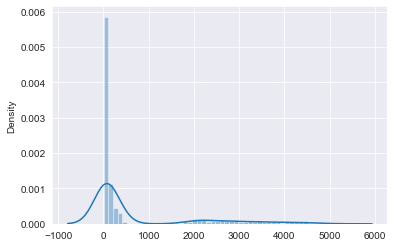

In [73]:
sns.distplot(numerical) # plots a frequency polygon superimposed on a histogram using the seaborn package.
# seaborn automatically creates class intervals. The number of bins can also be manually set.

**2) Distplot of the dataset (After normalization)**

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

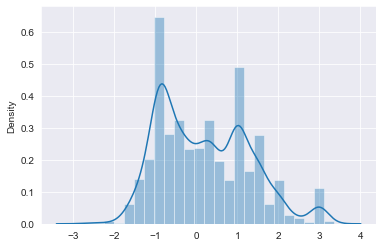

In [74]:
sns.distplot(numerical_norm)

* After normalizing/scaling, the dataset is more accurate in the distribution. It is normally distributed, however, there is a bit of skewness in the dataset.

**3) Distplot for Skewness and Kurtosis**

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings

<AxesSubplot:title={'center':'acc'}, xlabel='acc', ylabel='Density'>

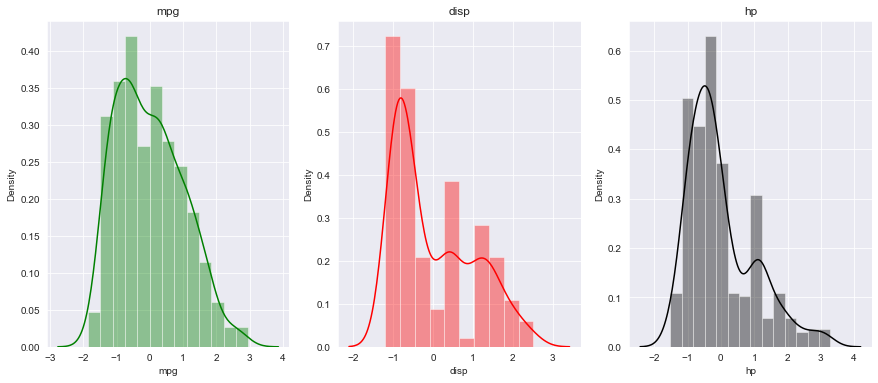

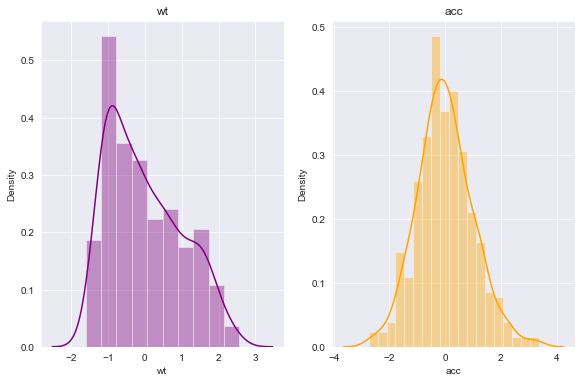

In [75]:
plt.figure(figsize=(20,6))
plt.subplot(1, 4, 1)
plt.title('mpg')
sns.distplot(numerical_norm['mpg'],color='green')

plt.subplot(1, 4, 2)
plt.title('disp')
sns.distplot(numerical_norm['disp'],color='red')

plt.subplot(1, 4, 3)
plt.title('hp')
sns.distplot(numerical_norm['hp'],color='black')

plt.figure(figsize=(20,6))
plt.subplot(1, 4, 1)
plt.title('wt')
sns.distplot(numerical_norm['wt'],color='purple')

plt.subplot(1, 4, 2)
plt.title('acc')
sns.distplot(numerical_norm['acc'],color='orange')



* From the above Plot, we can get a visual representation of the skewness and Kurtosis in the data.

* Skewness is the distortion of symmetry and when skewness value is between 0 to 1 are moderately skewed while greater than 1 or lesser than -1 are highly skewed. Postive and Negative skewness is as per the sign.


>mpg = 0.457, moderate positive/right skewness

>disp = 0.719, high positive/right skewness

>hp = 1.108, high positive/right skewness

>wt = 0.531, moderate positive/right skewness

>acc = 0.278, low positive/right skewness

* Kurtosis is a measure of tailedness that indicates the sharpness and flatness of peaks, Kurtosis 0 to 1 have flatter peaks while over 1 have sharper peaks and negative Kurtosis have the the least or more flatter peaks

>mpg = -0.510, moderately flat peak

>disp = -0.746, highly flat peak

>hp = 0.748, highly sharp peak

>wt =  -0.785, highly flat peak

>acc = 0.419, moderately sharp peak


### b) Barplot of categorical attributes in the dataset

**1) Barplot for Year to Frequency**

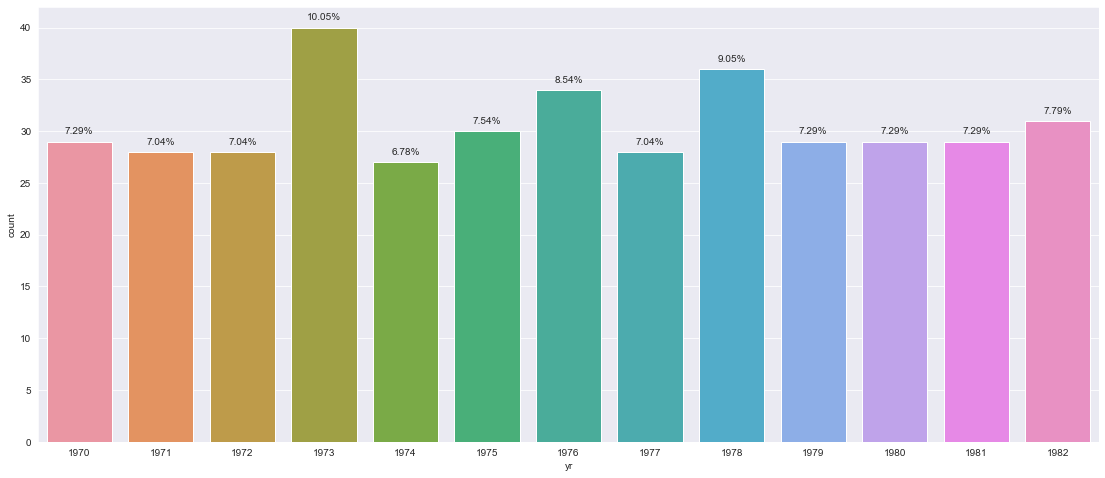

In [76]:
# Frequency of occurence of classes
fig, ax = plt.subplots(figsize=(20,8))
width = len(a['yr'].unique()) + 6
fig.set_size_inches(width , 8)
ax=sns.countplot(data = a, x= 'yr') 
for p in ax.patches: 
    ax.annotate(str((np.round(p.get_height()/len(a)*100,decimals=2)))+'%', (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

* The following observations from the plot are:

> 1973 (10.05%) 

> 1978 (9.05%) 

> 1976 (8.54%) 

> 1982 (7.79%) 

> 1975 (7.54%) 

> 1970, 1979, 1980, 1981 (7.29%)

> 1971,1972,1977 (7.04%) 

> 1974 (6.78%)

**2) Barplot for Origin to Frequency**

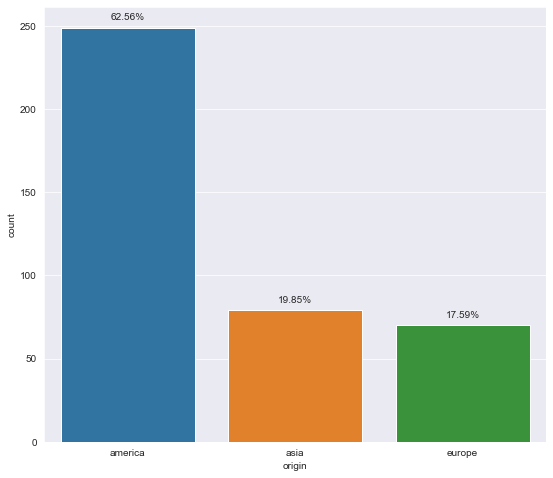

In [77]:
# Frequency of occurence of classes
fig, ax = plt.subplots(figsize=(20,8))
width = len(a['origin'].unique()) + 6
fig.set_size_inches(width , 8)
ax=sns.countplot(data = a, x= 'origin') 
for p in ax.patches: 
    ax.annotate(str((np.round(p.get_height()/len(a)*100,decimals=2)))+'%', (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

* The following observations from the plot are:

> america (62.56%) > asia (19.85%) > europe (17.59%)

**3) Barplot for Car name to Frequency**

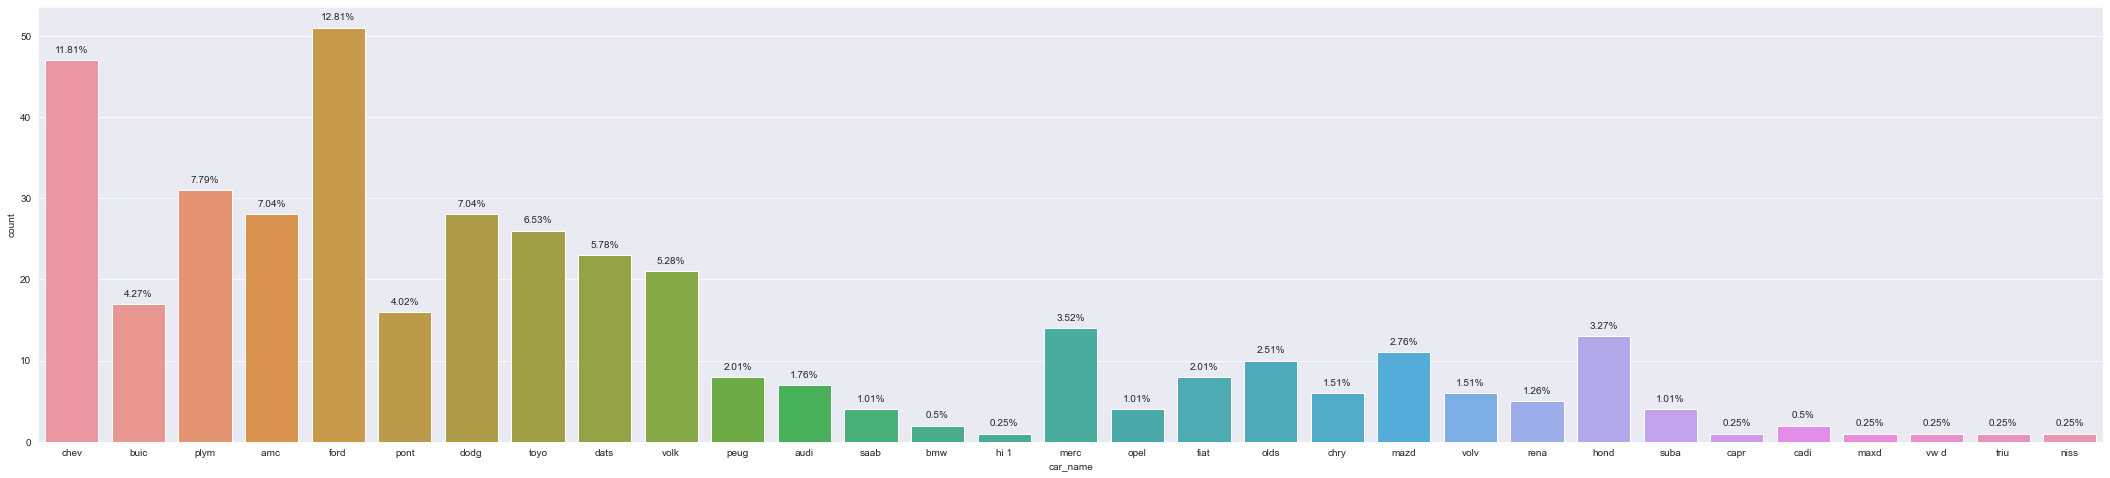

In [78]:
# Frequency of occurence of classes
fig, ax = plt.subplots(figsize=(20,8))
width = len(a['car_name'].unique()) + 6
fig.set_size_inches(width , 8)
ax=sns.countplot(data = a, x= 'car_name') 
for p in ax.patches: 
    ax.annotate(str((np.round(p.get_height()/len(a)*100,decimals=2)))+'%', (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

* The following observations from the plot are:

> 1-ford (51)

> 2-chevrolet (47)

> 3-plymouth (31) 

> 4-amc, 5-dodge (28)

> 6-toyota (26)

> 7-datsun (23) 

> 8-volkswagon (21)

> 9-buick (17)

> 10-pontiac (16)

> 11-mercury (14)

> 12-honda (13)

> 13-mazda(11)

> 14-oldsmobile (10)

> 15-fiat, 16-peugeot (8)

> 17-audi(7)

> 18-chrysler(6)

> 19-volvo (6)

> 20-renault (5)

> 21-saab (4)

> 22-subaru (4) 

> 23-bmw (2)

> 24-cadillac (2)

> 25-hi 1200 (1)

> 26-triumph (1)

> 27-capri (1)

> 28-nissan (1)

> Total - 356

**3) Barplot for Cylinders to Frequency**

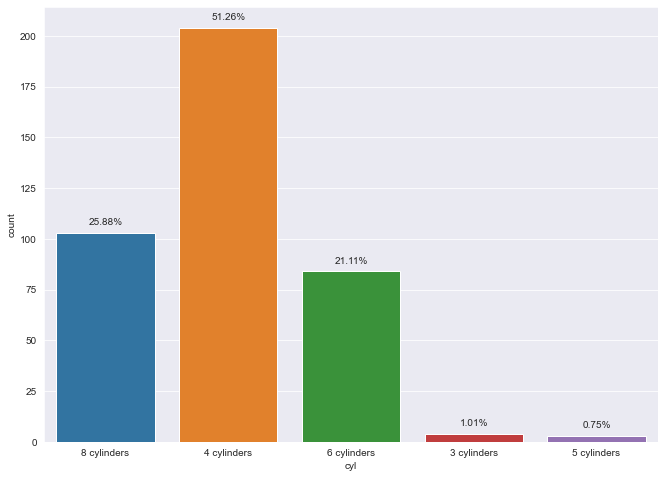

In [79]:
# Frequency of occurence of classes
fig, ax = plt.subplots(figsize=(20,8))
width = len(a['cyl'].unique()) + 6
fig.set_size_inches(width , 8)
ax=sns.countplot(data = a, x= 'cyl') 
for p in ax.patches: 
    ax.annotate(str((np.round(p.get_height()/len(a)*100,decimals=2)))+'%', (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

* The following observations from the plot are: 

> 4 cylinders (51.26%) > 8 cylinders (25.88%) > 6 cylinders (21.11%) > 3 cylinders (1.01%) > 5 cylinders (0.75%)

### c) MEAN, MEDIAN AND MODE HISTOGRAM

**1) mpg vs Frequency**

Mean:  23.514572864321615 
Median:  23.0 
Mode:  13.0


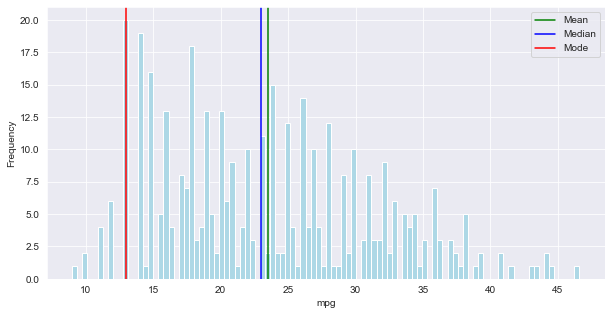

In [80]:
mean=numerical['mpg'].mean()
median=numerical['mpg'].median()
mode=numerical['mpg'].mode()

print('Mean: ',mean,'\nMedian: ',median,'\nMode: ',mode[0])

plt.figure(figsize=(10,5)) # set the figure size
plt.hist(numerical['mpg'],bins=100,color='lightblue') #Plot the histogram

plt.axvline(mean,color='green',label='Mean')     
plt.axvline(median,color='blue',label='Median')  
plt.axvline(mode[0],color='red',label='Mode')

plt.xlabel('mpg')   # label the x-axis
plt.ylabel('Frequency')   # label the y-axis
plt.legend()              # Plot the legend
plt.show()

* Mean (23.5) ~ Median (23.0) != Mode (13)

* Here, Mode <  Median < Mean - It is Right skewed or Positive Skewness. 

**2) disp vs Frequency**

Mean:  193.42587939698493 
Median:  148.5 
Mode:  97.0


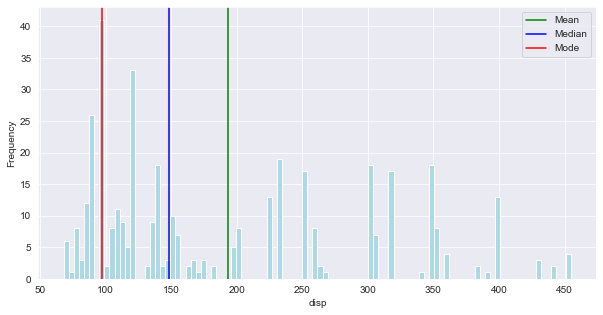

In [81]:
mean=numerical['disp'].mean()
median=numerical['disp'].median()
mode=numerical['disp'].mode()

print('Mean: ',mean,'\nMedian: ',median,'\nMode: ',mode[0])

plt.figure(figsize=(10,5)) # set the figure size
plt.hist(numerical['disp'],bins=100,color='lightblue') #Plot the histogram

plt.axvline(mean,color='green',label='Mean')     
plt.axvline(median,color='blue',label='Median')  
plt.axvline(mode[0],color='red',label='Mode')

plt.xlabel('disp')   # label the x-axis
plt.ylabel('Frequency')   # label the y-axis
plt.legend()              # Plot the legend
plt.show()

* Mean (193.4) != Median (148.5) != Mode (97.0)

* Here, Mode <  Median < Mean - It is Right skewed or Positive Skewness. 

**3) hp vs Frequency**

Mean:  104.09045226130654 
Median:  92.0 
Mode:  150.0


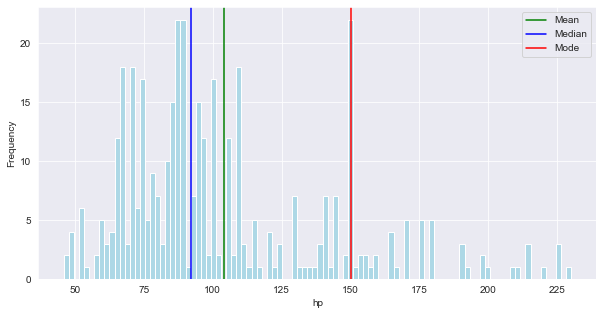

In [82]:
mean=numerical['hp'].mean()
median=numerical['hp'].median()
mode=numerical['hp'].mode()

print('Mean: ',mean,'\nMedian: ',median,'\nMode: ',mode[0])

plt.figure(figsize=(10,5)) # set the figure size
plt.hist(numerical['hp'],bins=100,color='lightblue') #Plot the histogram

plt.axvline(mean,color='green',label='Mean')     
plt.axvline(median,color='blue',label='Median')  
plt.axvline(mode[0],color='red',label='Mode')

plt.xlabel('hp')   # label the x-axis
plt.ylabel('Frequency')   # label the y-axis
plt.legend()              # Plot the legend
plt.show()

* Mean (104.0) != Median (92.0) != Mode (150.0)

* Here, Mode >  (Median < Mean) - It is Right skewed or Positive Skewness. 

**4) wt vs Frequency**

Mean:  2970.424623115578 
Median:  2803.5 
Mode:  1985


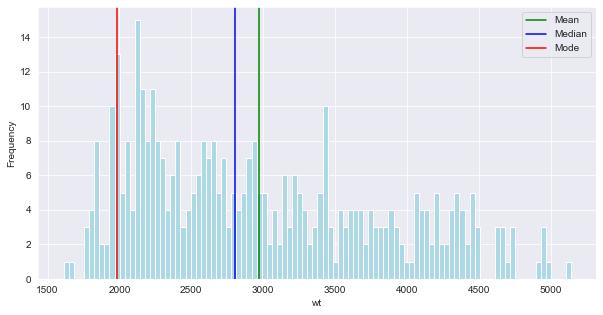

In [83]:
mean=numerical['wt'].mean()
median=numerical['wt'].median()
mode=numerical['wt'].mode()

print('Mean: ',mean,'\nMedian: ',median,'\nMode: ',mode[0])

plt.figure(figsize=(10,5)) # set the figure size
plt.hist(numerical['wt'],bins=100,color='lightblue') #Plot the histogram

plt.axvline(mean,color='green',label='Mean')     
plt.axvline(median,color='blue',label='Median')  
plt.axvline(mode[0],color='red',label='Mode')

plt.xlabel('wt')   # label the x-axis
plt.ylabel('Frequency')   # label the y-axis
plt.legend()              # Plot the legend
plt.show()

* Mean (2970.42) != Median (2803.5) != Mode (1985)

* Here, Mode < Median < Mean - It is Right skewed or Positive Skewness. 

**5) acc vs Frequency**

Mean:  15.568090452261291 
Median:  15.5 
Mode:  14.5


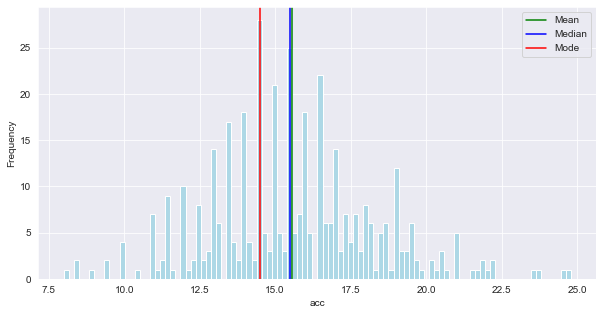

In [84]:
mean=numerical['acc'].mean()
median=numerical['acc'].median()
mode=numerical['acc'].mode()

print('Mean: ',mean,'\nMedian: ',median,'\nMode: ',mode[0])

plt.figure(figsize=(10,5)) # set the figure size
plt.hist(numerical['acc'],bins=100,color='lightblue') #Plot the histogram

plt.axvline(mean,color='green',label='Mean')     
plt.axvline(median,color='blue',label='Median')  
plt.axvline(mode[0],color='red',label='Mode')

plt.xlabel('acc')   # label the x-axis
plt.ylabel('Frequency')   # label the y-axis
plt.legend()              # Plot the legend
plt.show()

* Mean (15.5) = Median (15.5) ~ Mode (14.5)

* Here, Mode ~ (Median = Mean) - It is Normally distributed

### c) BOX PLOT

In [85]:
numerical.dtypes

mpg     float64
disp    float64
hp      float64
wt        int64
acc     float64
dtype: object

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\Anaconda\lib\site-packages\seaborn\_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\Anaconda\lib\site-packages\seaborn\_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
D:\Anaconda\lib\site

<AxesSubplot:title={'center':'acc'}, xlabel='acc'>

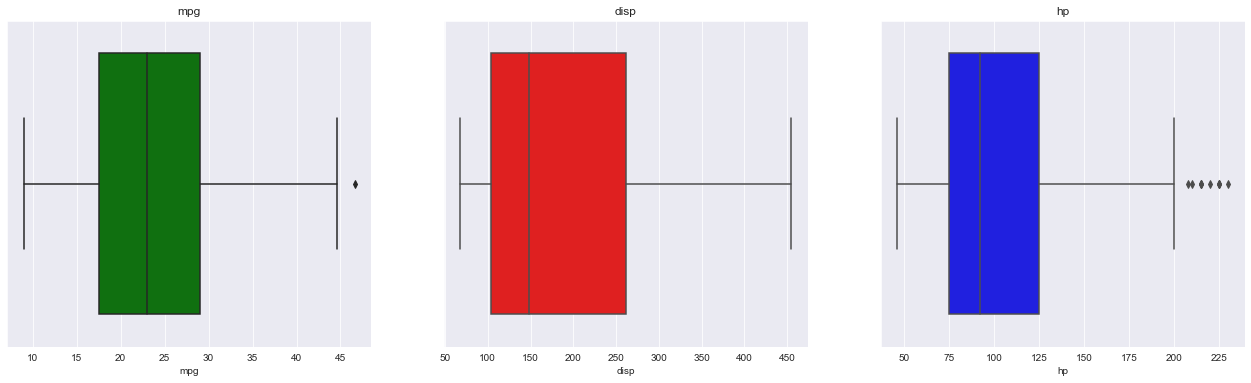

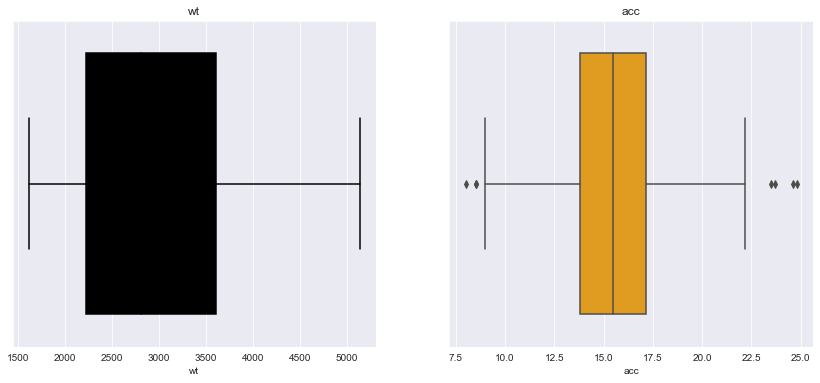

In [86]:
plt.figure(figsize=(30,6))
plt.subplot(1, 4, 1)
plt.title('mpg')
sns.boxplot(numerical['mpg'],orient='vertical',color='green')

plt.subplot(1, 4, 2)
plt.title('disp')
sns.boxplot(numerical['disp'],orient='vertical',color='red')

plt.subplot(1, 4, 3)
plt.title('hp')
sns.boxplot(numerical['hp'],orient='vertical',color='blue')

plt.figure(figsize=(30,6))
plt.subplot(1, 4, 1)
plt.title('wt')
sns.boxplot(numerical['wt'],orient='vertical',color='black')

plt.subplot(1, 4, 2)
plt.title('acc')
sns.boxplot(numerical['acc'],orient='vertical',color='orange')

In [87]:
# Finding the Interquartile Range for the Dataset
Q1 = numerical.quantile(0.25)
Q2 = numerical.quantile(0.50)
Q3 = numerical.quantile(0.75) 
IQR = Q3 - Q1
IQR

mpg       11.50
disp     157.75
hp        50.00
wt      1384.25
acc        3.35
dtype: float64

In [88]:
# Finding the Lowerfence values in the Dataset
Lowerfence_inner = Q1-(1.5 * IQR)
Lowerfence_inner

mpg       0.250
disp   -132.375
hp        0.000
wt      147.375
acc       8.800
dtype: float64

In [89]:
# Finding the Upperfence values in the Dataset
Upperfence_inner = Q3+(1.5 * IQR)
Upperfence_inner

mpg       46.250
disp     498.625
hp       200.000
wt      5684.375
acc       22.200
dtype: float64

**Total number of Upper fence outliers**

In [90]:
# Count of Outliers over the upper fence
countoutup =(numerical>Upperfence_inner).sum()
countoutup

mpg      1
disp     0
hp      10
wt       0
acc      4
dtype: int64

**Total number of Lower fence outliers**

In [91]:
# Count of Outliers below the lower fence
countoutdown =(numerical<Lowerfence_inner).sum()
countoutdown

mpg     0
disp    0
hp      0
wt      0
acc     3
dtype: int64

**Total number of outliers**

In [92]:
#Count of Total Outliers
Totalout = countoutup + countoutdown
Totalout

mpg      1
disp     0
hp      10
wt       0
acc      7
dtype: int64

### Removing outliers from the dataset

In [93]:
# We can further remove the outliers for better clarity on the data
Doutlier = numerical.copy()
def remove_outliers(Doutlier, q=0.05):
    upper = Doutlier.quantile(1-q)
    lower = Doutlier.quantile(q)
    mask = (Doutlier < upper) & (Doutlier > lower)
    return mask
mask = remove_outliers(Doutlier, 0.1)
Doutlier = Doutlier[mask]

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\Anaconda\lib\site-packages\seaborn\_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\Anaconda\lib\site-packages\seaborn\_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
D:\Anaconda\lib\site

<AxesSubplot:title={'center':'acc'}, xlabel='acc'>

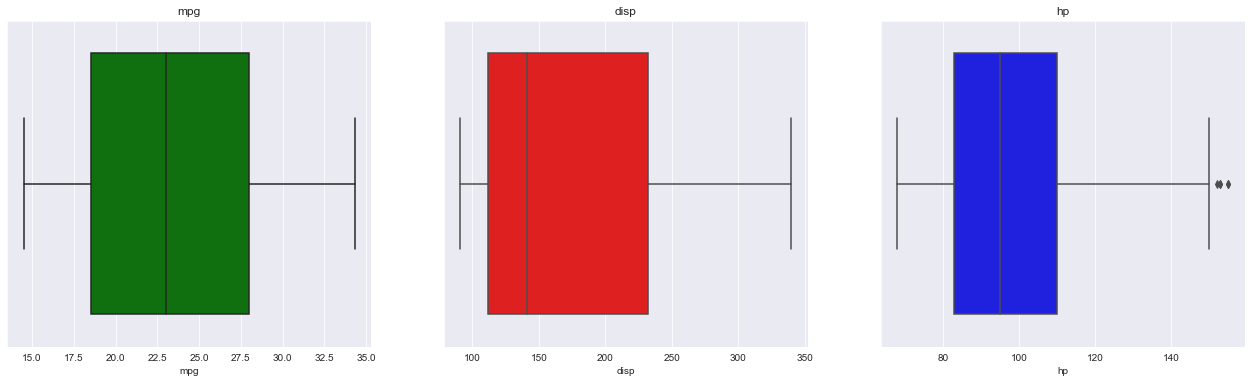

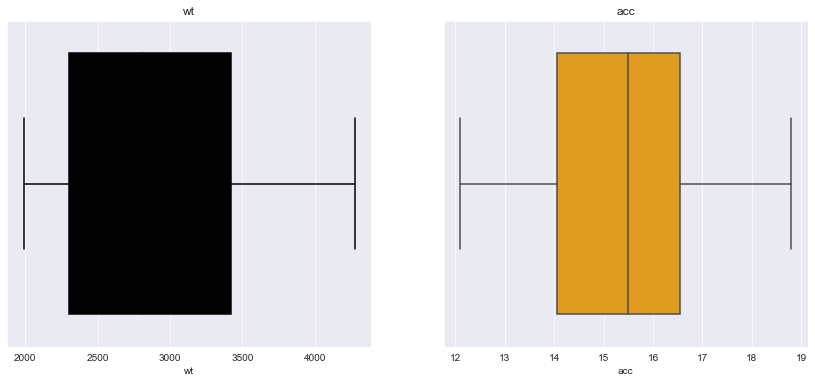

In [94]:
plt.figure(figsize=(30,6))
plt.subplot(1, 4, 1)
plt.title('mpg')
sns.boxplot(Doutlier['mpg'],orient='vertical',color='green')

plt.subplot(1, 4, 2)
plt.title('disp')
sns.boxplot(Doutlier['disp'],orient='vertical',color='red')

plt.subplot(1, 4, 3)
plt.title('hp')
sns.boxplot(Doutlier['hp'],orient='vertical',color='blue')

plt.figure(figsize=(30,6))
plt.subplot(1, 4, 1)
plt.title('wt')
sns.boxplot(Doutlier['wt'],orient='vertical',color='black')

plt.subplot(1, 4, 2)
plt.title('acc')
sns.boxplot(Doutlier['acc'],orient='vertical',color='orange')

### d) CUMULATIVE DISTRIBUTION

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

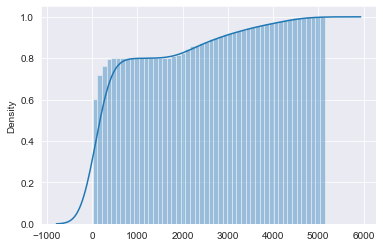

In [95]:
#Cumulative Distribution Plot
sns.distplot(numerical, hist_kws=dict(cumulative=True), kde_kws=dict(cumulative=True))

* The cumulative distribution function (CDF) calculates the cumulative probability for a given x-value. Use the CDF to determine the probability that a random observation that is taken from the population will be less than or equal to a certain value.


<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;">3.2.2 Bivariate Analysis
   

### a) Bivariate barplot between Categorical and continuous attributes

**1) mpg vs all categorical attributes**

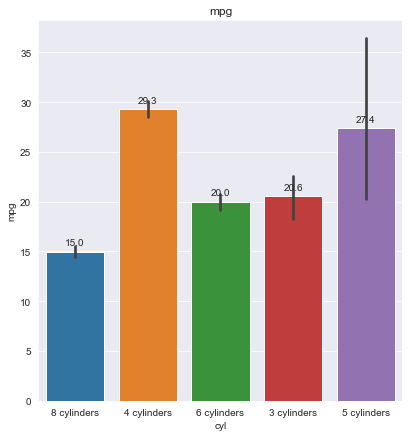

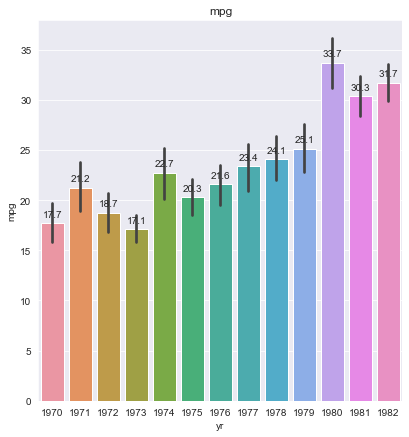

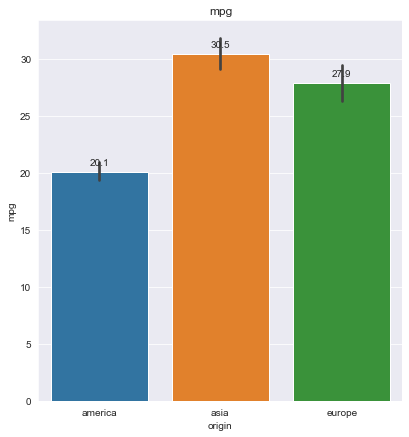

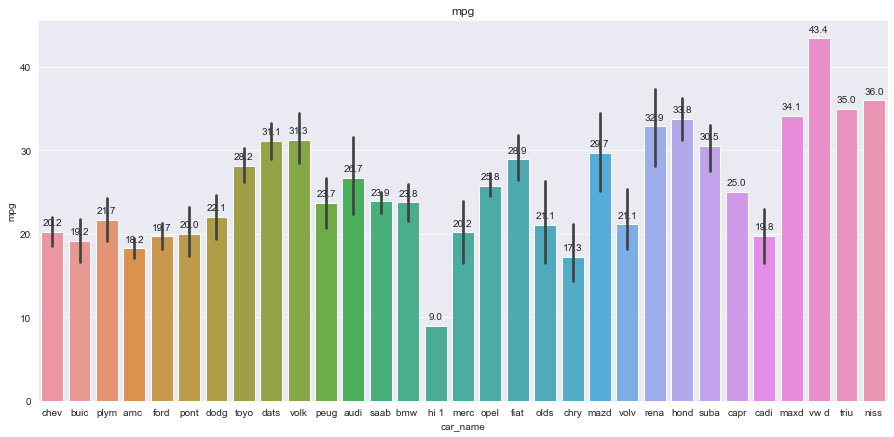

In [96]:
#BiVariate Analysis with Barplot

plt.figure(figsize=(30,7))
plt.subplot(1, 4, 1)
plt.title('mpg')
splot = sns.barplot(x=a['cyl'], y=a['mpg'])
# Annotate the bars in plot
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')    
plt.show()
plt.figure(figsize=(30,7))
plt.subplot(1, 4, 1)
plt.title('mpg')
splot = sns.barplot(x=a['yr'], y=a['mpg'])
# Annotate the bars in plot
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')    
plt.show()

plt.figure(figsize=(30,7))
plt.subplot(1, 4, 1)
plt.title('mpg')
splot = sns.barplot(x=a['origin'], y=a['mpg'])
# Annotate the bars in plot
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')    
plt.show()
plt.figure(figsize=(70,7))
plt.subplot(1, 4, 1)
plt.title('mpg')
splot = sns.barplot(x=a['car_name'], y=a['mpg'])
# Annotate the bars in plot
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')    
plt.show()


The above plot is 'mpg' continuous attribute vs all categorical attributes, the following observations are:

Miles Per Gallon (mpg) - higher the more efficient

> 1) Cylinder = 4 cylinders > 5 cylinders > 3 cylinders > 6 cylinders > 8 cylinders is the order of efficient fuel consumption - miles per gallon. 4 cylinders having the best fuel consumption and 8 cylinders having the worst fuel consumption. 

> 2) Year = 1980 > 1982 > 1981 > 1979 > 1978 > 1977 > 1974 > 1976 > 1971 > 1975 > 1972 > 1970 > 1973 is the order of efficient fuel consumption - miles per gallon. 1980 having the best fuel consumption and 1973 having the worst fuel consumption. 

> 3) Origin = asia > europe > america is the order of efficient fuel consumption - miles per gallon. Asia having the best fuel consumption and america having the worst fuel consumption. 

> 4) Car_name = Honda has the best mpg fuel consumption, followed by renault,volkswagon and datsun. The worst fuel consumption is from hi 1200d, followed by chrysler, amc and buick. Here, last 4 cars dont have sufficient data so we cannot consider those for data analysis.

**2) disp vs all categorical attributes**

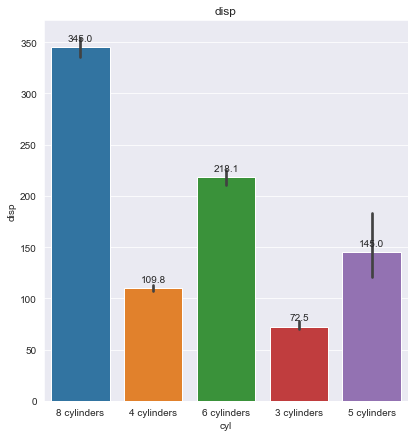

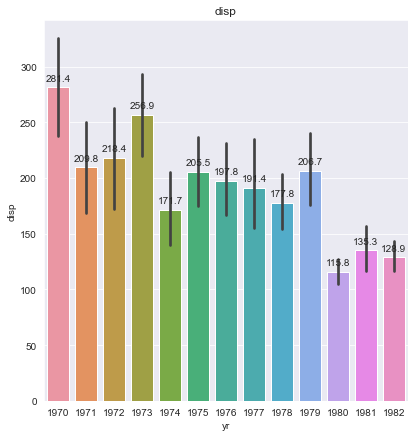

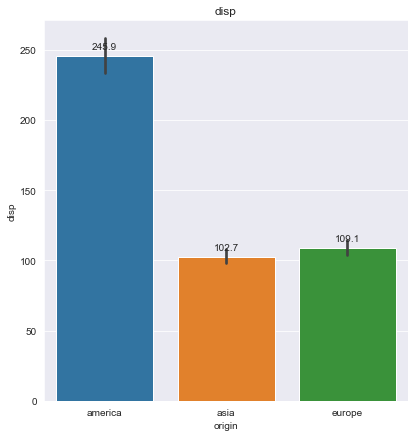

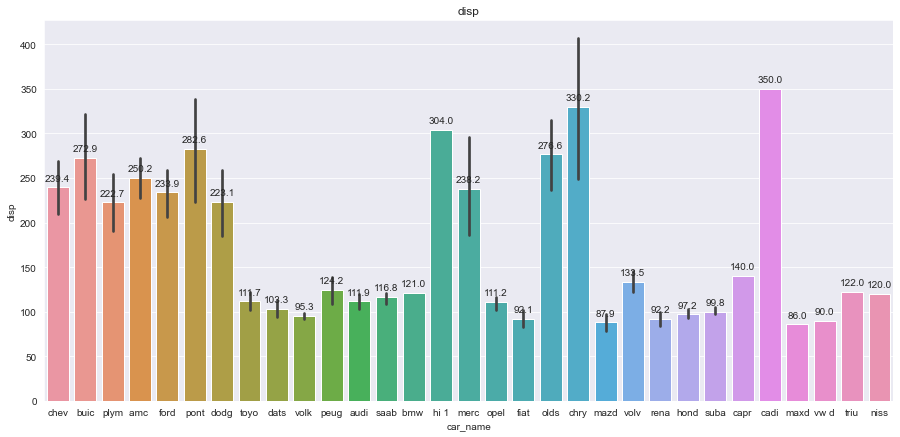

In [97]:
#BiVariate Analysis with Barplot

plt.figure(figsize=(30,7))
plt.subplot(1, 4, 1)
plt.title('disp')
splot = sns.barplot(x=a['cyl'], y=a['disp'])
# Annotate the bars in plot
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')    
plt.show()
plt.figure(figsize=(30,7))
plt.subplot(1, 4, 1)
plt.title('disp')
splot = sns.barplot(x=a['yr'], y=a['disp'])
# Annotate the bars in plot
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')    
plt.show()

plt.figure(figsize=(30,7))
plt.subplot(1, 4, 1)
plt.title('disp')
splot = sns.barplot(x=a['origin'], y=a['disp'])
# Annotate the bars in plot
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')    
plt.show()
plt.figure(figsize=(70,7))
plt.subplot(1, 4, 1)
plt.title('disp')
splot = sns.barplot(x=a['car_name'], y=a['disp'])
# Annotate the bars in plot
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')    
plt.show()


The above plot is 'disp' continuous attribute vs all categorical attributes, the following observations are: 

Engine volume (displacement)

> 1) Cylinder = 8 cylinders > 6 cylinders > 5 cylinders > 4 cylinders > 3 cylinders is the order of Engine volume or displacement. 

> 2) Year = 1970> 1973 > 1972 > 1971 > 1979 > 1975 > 1976 > 1977 > 1978 > 1974 > 1981 > 1982 > 1980 is the order of Engine volume or displacement.

> 3) Origin = america > europe > asia is the order of Engine volume or displacement. America having the highest engine volumes/displacement and asia having the lowest engine volumes/displacement.

> 4) Car_name = Cadillac, Chrysler, hi 1200d have the highest engine volume/displacement while mazda, fiat and renault have the lowest engine volume/displacement. 

**3) hp vs all categorical attributes**

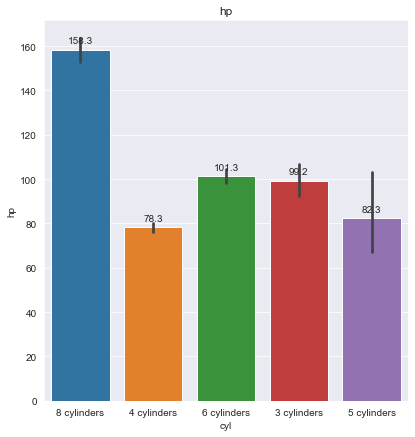

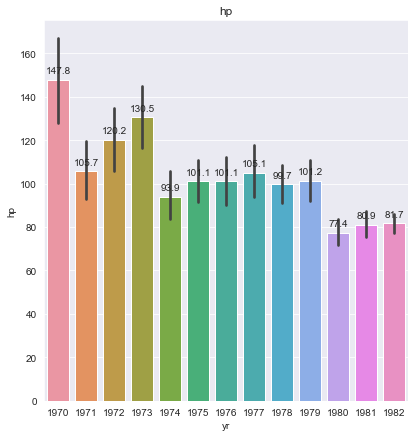

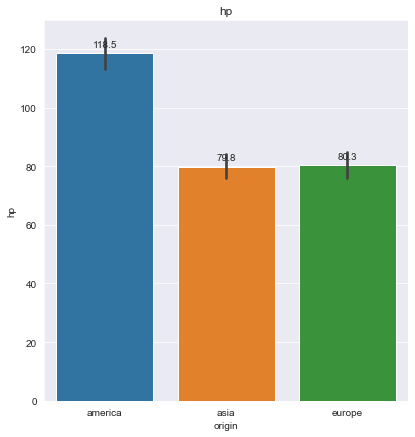

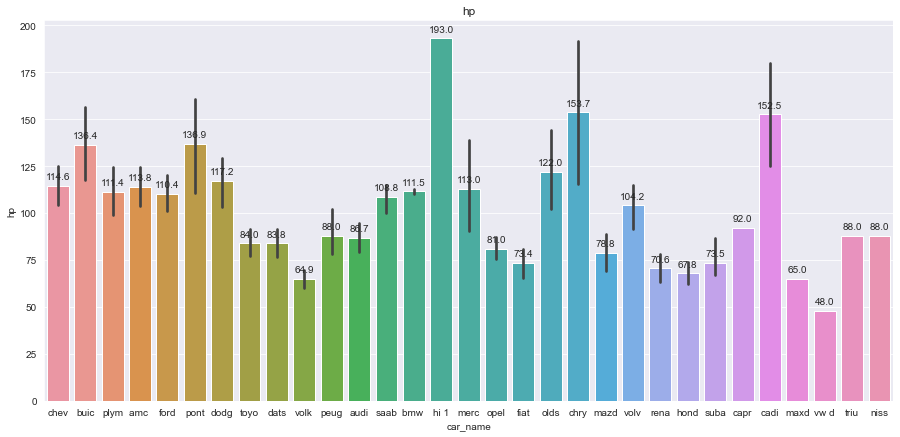

In [98]:
#BiVariate Analysis with Barplot

plt.figure(figsize=(30,7))
plt.subplot(1, 4, 1)
plt.title('hp')
splot = sns.barplot(x=a['cyl'], y=a['hp'])
# Annotate the bars in plot
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')    
plt.show()
plt.figure(figsize=(30,7))
plt.subplot(1, 4, 1)
plt.title('hp')
splot = sns.barplot(x=a['yr'], y=a['hp'])
# Annotate the bars in plot
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')    
plt.show()

plt.figure(figsize=(30,7))
plt.subplot(1, 4, 1)
plt.title('hp')
splot = sns.barplot(x=a['origin'], y=a['hp'])
# Annotate the bars in plot
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')    
plt.show()
plt.figure(figsize=(70,7))
plt.subplot(1, 4, 1)
plt.title('hp')
splot = sns.barplot(x=a['car_name'], y=a['hp'])
# Annotate the bars in plot
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')    
plt.show()


The above plot is 'hp' continuous attribute vs all categorical attributes, the following observations are: 

Horse power (hp)

> 1) Cylinder = 8 cylinders > 6 cylinders > 3 cylinders > 5 cylinders > 4 cylinders is the order of Horsepower 

> 2) Year = 1970> 1973 > 1972 > 1971 > 1977 > 1979 > 1976 = 1975 > 1978 > 1984> 1982 > 1981 > 1980 is the order of horsepower. 

> 3) Origin = america > europe ~ asia is the order of horsepower

> 4) Car_name = hi 1200d, cadillac and chrysler have the highest horsepower while volkswagon, honda and renault have the lowest horsepower. 

**4) acc vs all categorical attributes**

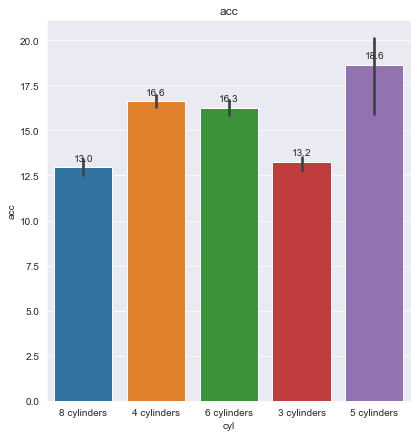

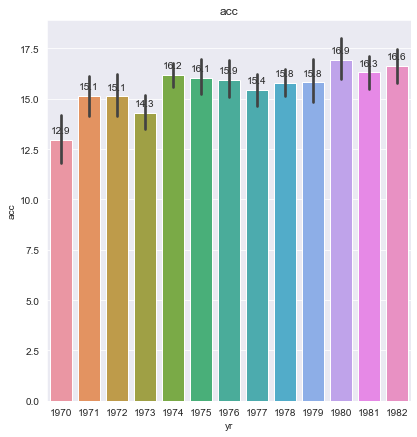

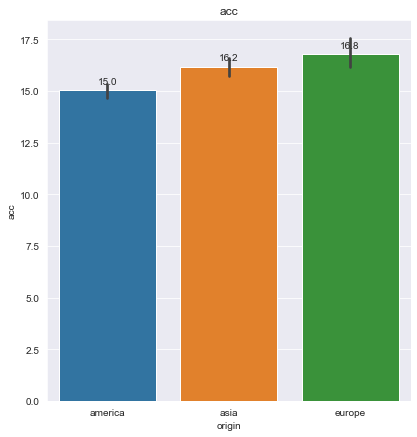

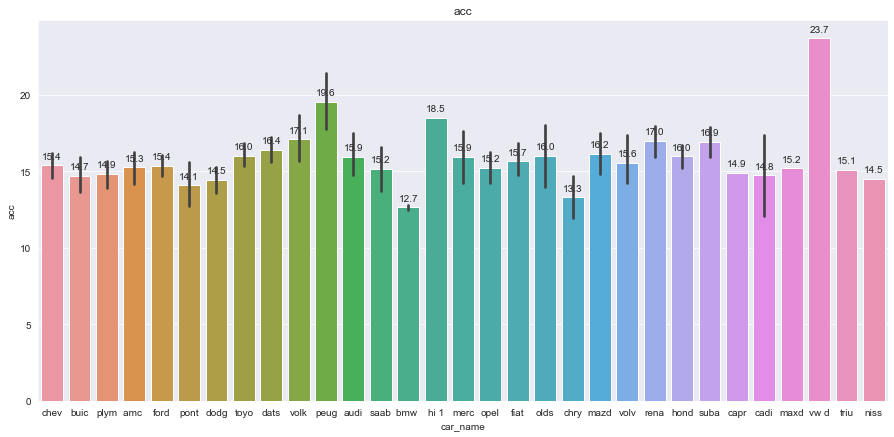

In [99]:
#BiVariate Analysis with Barplot

plt.figure(figsize=(30,7))
plt.subplot(1, 4, 1)
plt.title('acc')
splot = sns.barplot(x=a['cyl'], y=a['acc'])
# Annotate the bars in plot
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')    
plt.show()
plt.figure(figsize=(30,7))
plt.subplot(1, 4, 1)
plt.title('acc')
splot = sns.barplot(x=a['yr'], y=a['acc'])
# Annotate the bars in plot
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')    
plt.show()

plt.figure(figsize=(30,7))
plt.subplot(1, 4, 1)
plt.title('acc')
splot = sns.barplot(x=a['origin'], y=a['acc'])
# Annotate the bars in plot
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')    
plt.show()
plt.figure(figsize=(70,7))
plt.subplot(1, 4, 1)
plt.title('acc')
splot = sns.barplot(x=a['car_name'], y=a['acc'])
# Annotate the bars in plot
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')    
plt.show()


The above plot is 'acc' continuous attribute vs all categorical attributes, the following observations are: 

acceleration (acc)

> 1) Cylinder = 5 cylinders > 4 cylinders >6 cylinders > 3 cylinders > 8 cylinders is the order of acceleration. 

> 2) Year = 1980 > 1982 > 1981 > 1974 > 1975 > 1976 > 1978 = 1979 > 1977 > 1971 = 1972 > 1973 > 1970 is the order of acceleration. 

> 3) Origin = europe > asia > america is the order of acceleration.

> 4) Car_name = peugeot, hi 1200d, renault and volkswagon have the highest acceleration while bmw, chrysler and pontiac have the lowest acceleration. 

**5) wt vs all categorical attributes**

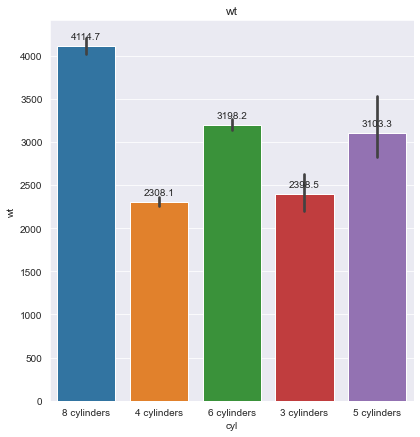

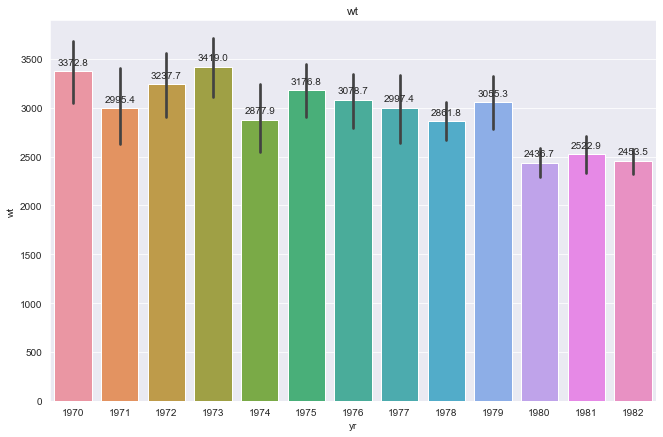

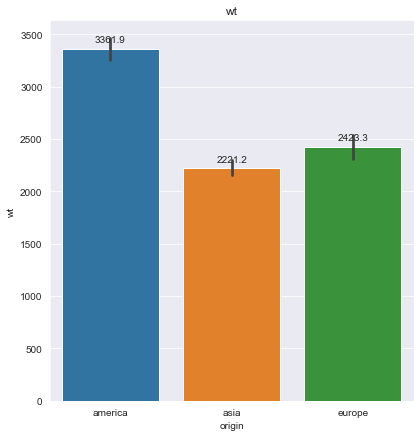

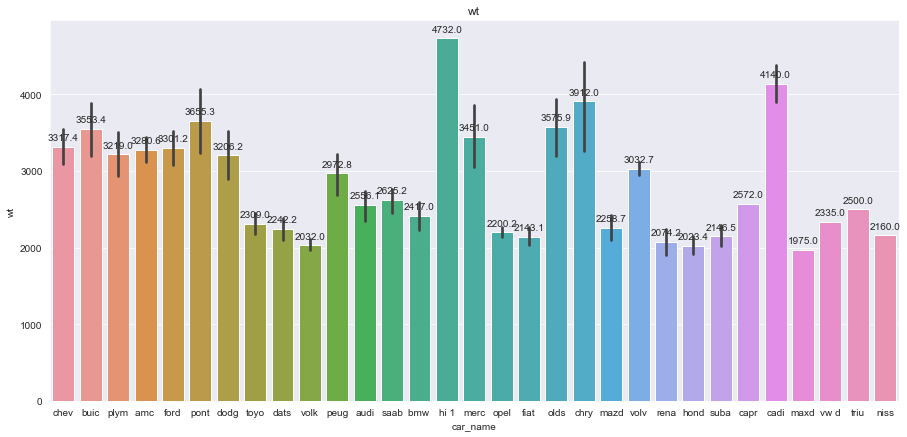

In [100]:
#BiVariate Analysis with Barplot

plt.figure(figsize=(30,7))
plt.subplot(1, 4, 1)
plt.title('wt')
splot = sns.barplot(x=a['cyl'], y=a['wt'])
# Annotate the bars in plot
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')    
plt.show()
plt.figure(figsize=(50,7))
plt.subplot(1, 4, 1)
plt.title('wt')
splot = sns.barplot(x=a['yr'], y=a['wt'])
# Annotate the bars in plot
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')    
plt.show()

plt.figure(figsize=(30,7))
plt.subplot(1, 4, 1)
plt.title('wt')
splot = sns.barplot(x=a['origin'], y=a['wt'])
# Annotate the bars in plot
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')    
plt.show()
plt.figure(figsize=(70,7))
plt.subplot(1, 4, 1)
plt.title('wt')
splot = sns.barplot(x=a['car_name'], y=a['wt'])
# Annotate the bars in plot
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')    
plt.show()


The above plot is 'wt' continuous attribute vs all categorical attributes, the following observations are: 

Weight (wt)

> 1) Cylinder = 8 cylinders > 6 cylinders >5 cylinders > 3 cylinders > 4 cylinders is the order of Weight. 

> 2) Year = 1973 > 1970 > 1972 > 1975 > 1976 > 1979 > 1971 > 1974 > 1978 > 1981 > 1980 > 1982 > 1970 is the order of Weight. 

> 3) Origin = america > europe > asia  is the order of Weight.

> 4) Car_name = hi 1200d, cadillac, chrysler, and pontiac have the highest weight while honda, volkswagon and renault have the lowest weight. 

<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;">3.2.3 Multivariate Analysis
   

### a) Multivariate 2 categorical and 1 numerical barplot

In [101]:
a.dtypes

car_name     object
mpg         float64
cyl          object
disp        float64
hp          float64
wt            int64
acc         float64
yr           object
origin       object
dtype: object

**1) disp vs Categorical attributes and origin as hue**

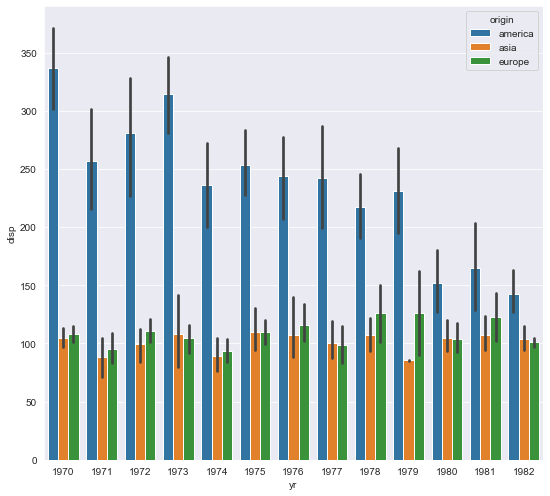

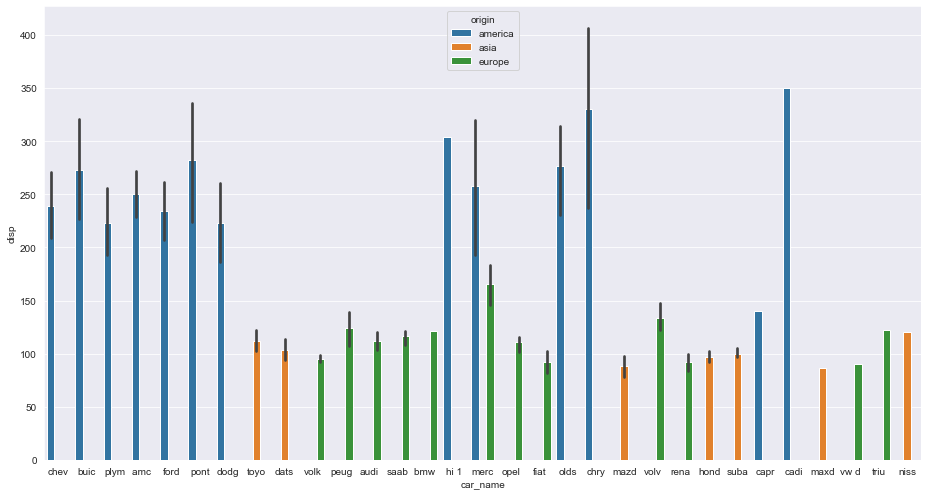

In [102]:
plt.figure(figsize=(30,7))
plt.subplot(1, 4, 2)
sns.barplot(y='disp',x='yr',hue='origin',data=a);
plt.ylabel('disp')
plt.tight_layout()

plt.figure(figsize=(50,7))
plt.subplot(1, 4, 1)
sns.barplot(y='disp',x='car_name',hue='origin',data=a);
plt.ylabel('disp')
plt.tight_layout()

The above plot is 'disp' continuous attribute vs all categorical attributes and hue 'origin', the following observations are:

> 1) America is having the highest displacement and on year 1970, followed by europe in 1979 and asia in 1975.

> 2) American car 'Cadillac' has the highest displacement, followed by mercedes from europe and toyota in asia. The last 4 cars are not statistically accurate as they have very few values.

**2) mpg vs Categorical attributes and origin as hue**

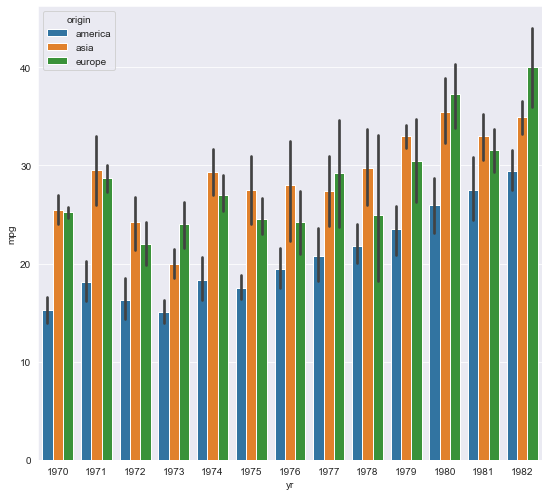

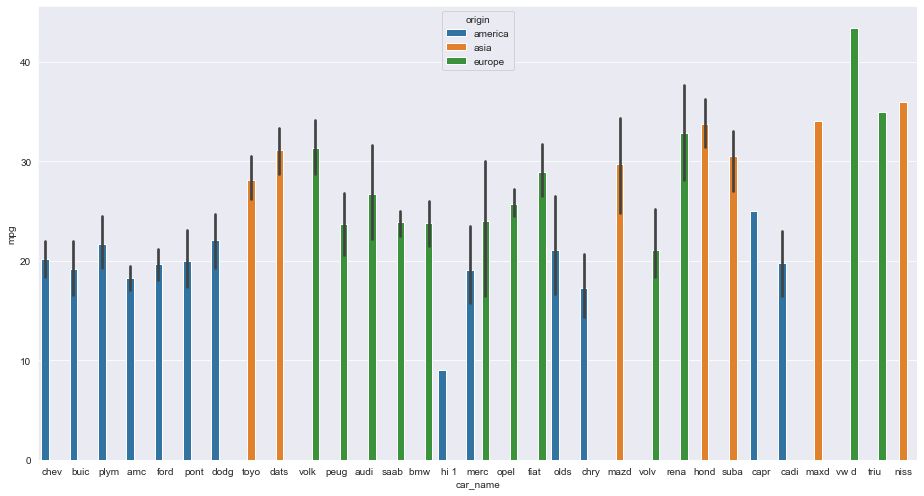

In [103]:
plt.figure(figsize=(30,7))
plt.subplot(1, 4, 2)
sns.barplot(y='mpg',x='yr',hue='origin',data=a);
plt.ylabel('mpg')
plt.tight_layout()

plt.figure(figsize=(50,7))
plt.subplot(1, 4, 1)
sns.barplot(y='mpg',x='car_name',hue='origin',data=a);
plt.ylabel('mpg')
plt.tight_layout()


The above plot is 'mpg' continuous attribute vs all categorical attributes and hue 'origin', the following observations are:

> 1) Europe is having the highest miles per gallon and on year 1982, followed by asia in 1980 and america in 1982.

> 2) Asian car 'honda' has the highest mpg, followed by renault from europe and dodge in america. The last 4 cars are not statistically accurate as they have very few values.

**3) hp vs Categorical attributes and origin as hue**

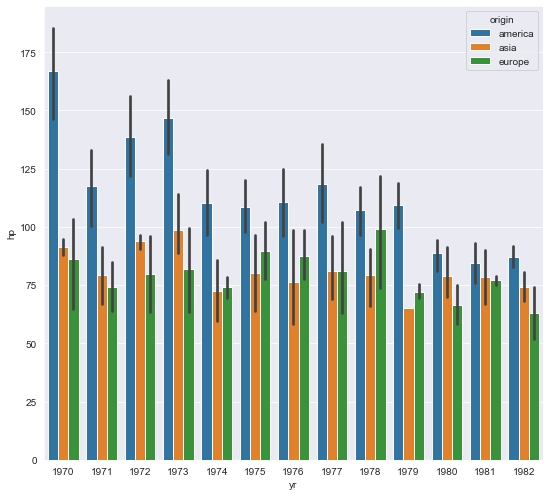

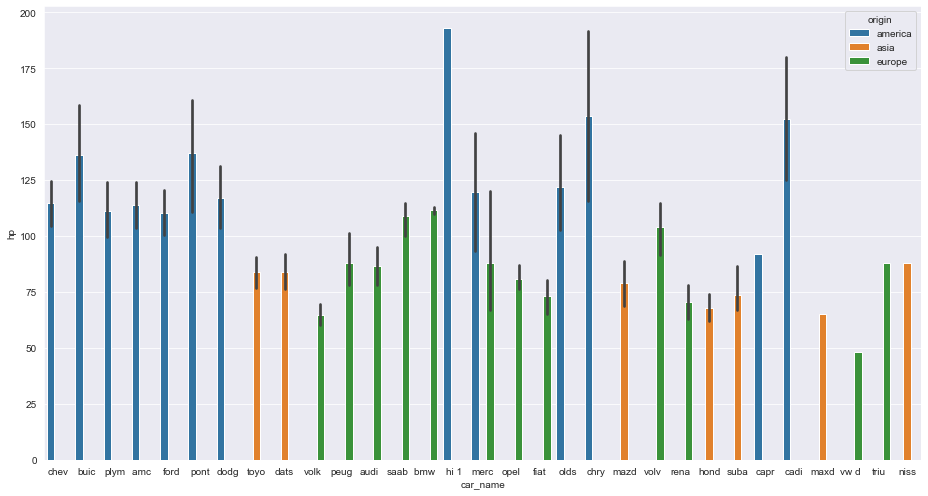

In [104]:
plt.figure(figsize=(30,7))
plt.subplot(1, 4, 2)
sns.barplot(y='hp',x='yr',hue='origin',data=a);
plt.ylabel('hp')
plt.tight_layout()

plt.figure(figsize=(50,7))
plt.subplot(1, 4, 1)
sns.barplot(y='hp',x='car_name',hue='origin',data=a);
plt.ylabel('hp')
plt.tight_layout()

The above plot is 'hp' continuous attribute vs all categorical attributes and hue 'origin', the following observations are:

> 1) America is having the highest horsepower and on year 1970, followed by europe in 1978 and asia in 1973.

> 2) america car 'chrysler' has the highest horsepower, followed by bmw from europe and datsun in asia. The last 4 cars are not statistically accurate as they have very few values.

**4) acc vs Categorical attributes and origin as hue**

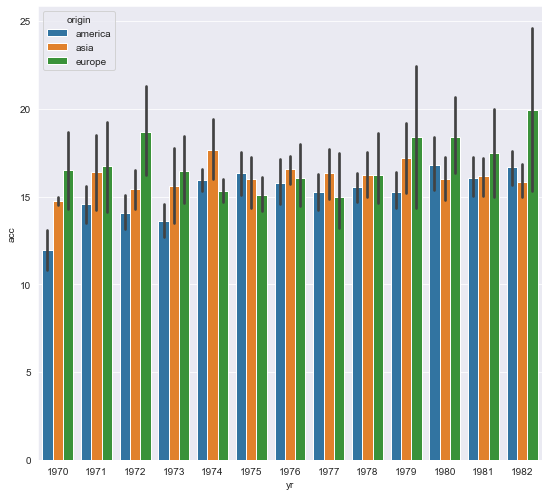

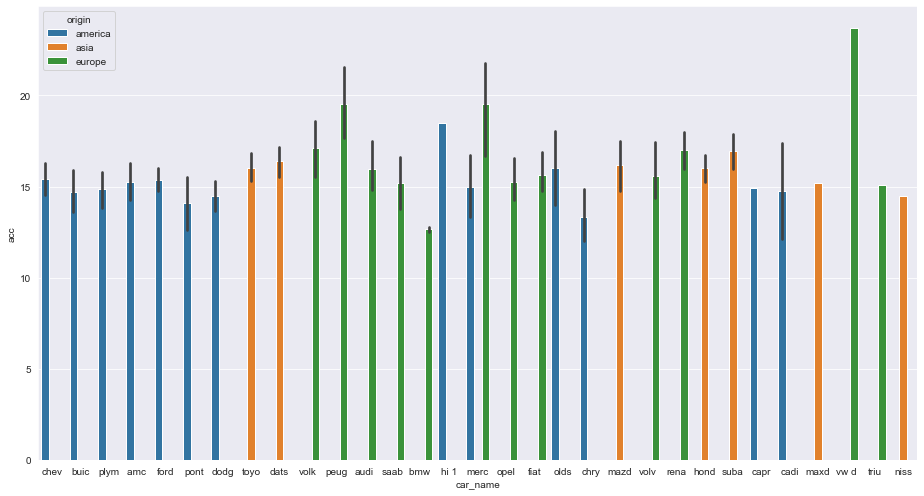

In [105]:
plt.figure(figsize=(30,7))
plt.subplot(1, 4, 2)
sns.barplot(y='acc',x='yr',hue='origin',data=a);
plt.ylabel('acc')
plt.tight_layout()

plt.figure(figsize=(50,7))
plt.subplot(1, 4, 1)
sns.barplot(y='acc',x='car_name',hue='origin',data=a);
plt.ylabel('acc')
plt.tight_layout()

The above plot is 'acc' continuous attribute vs all categorical attributes and hue 'origin', the following observations are:

> 1) Europe is having the highest acceleration and on year 1982, followed by asia in 1979 and america in 1980.

> 2) European car 'peugeot' has the highest acceleration, followed by subaru from asia and oldsmobile in america. The last 4 cars are not statistically accurate as they have very few values.

**5) wt vs Categorical attributes and origin as hue**

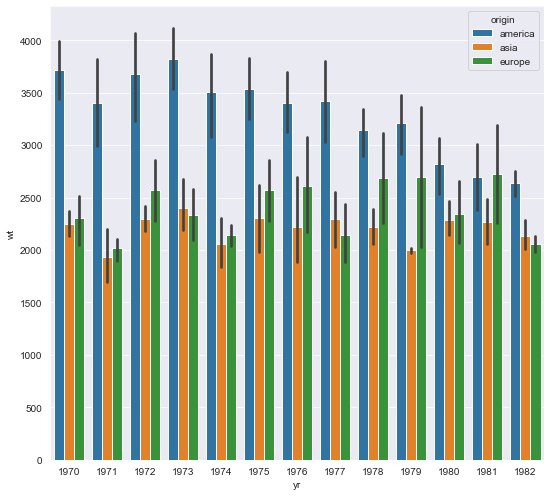

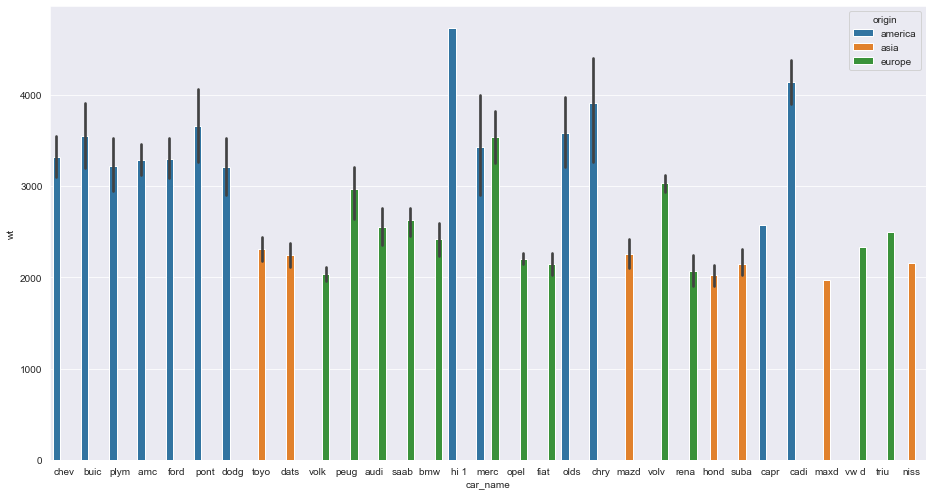

In [106]:
plt.figure(figsize=(30,7))
plt.subplot(1, 4, 2)
sns.barplot(y='wt',x='yr',hue='origin',data=a);
plt.ylabel('wt')
plt.tight_layout()

plt.figure(figsize=(50,7))
plt.subplot(1, 4, 1)
sns.barplot(y='wt',x='car_name',hue='origin',data=a);
plt.ylabel('wt')
plt.tight_layout()

The above plot is 'wt' continuous attribute vs all categorical attributes and hue 'origin', the following observations are:

> 1) america is having the highest weight and on year 1973, followed by europe in 1981 and asia in 1973.

> 2) American car 'Chrysler' has the highest weight, followed by Mercury from Europe and toyota in asia. The last 4 cars are not statistically accurate as they have very few values.

### b) Correlation Heatmap

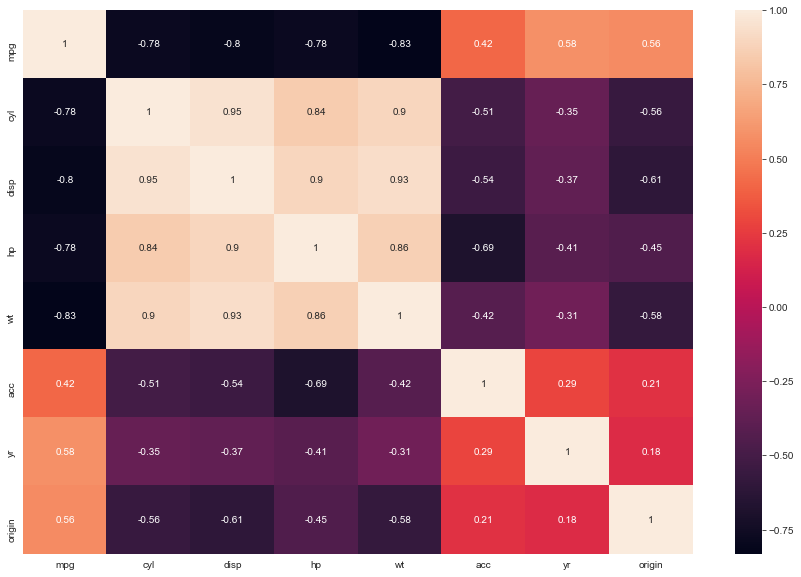

In [107]:
sns.set_palette(sns.color_palette("Set2", 8))
plt.figure(figsize=(15,10))
sns.heatmap(model_normalized.corr(),annot=True)
plt.show()

* This is the correlation of the dataset which will be used for the model where wt,disp and hp are highly correlated

### c) Pairplot for checking the correlation

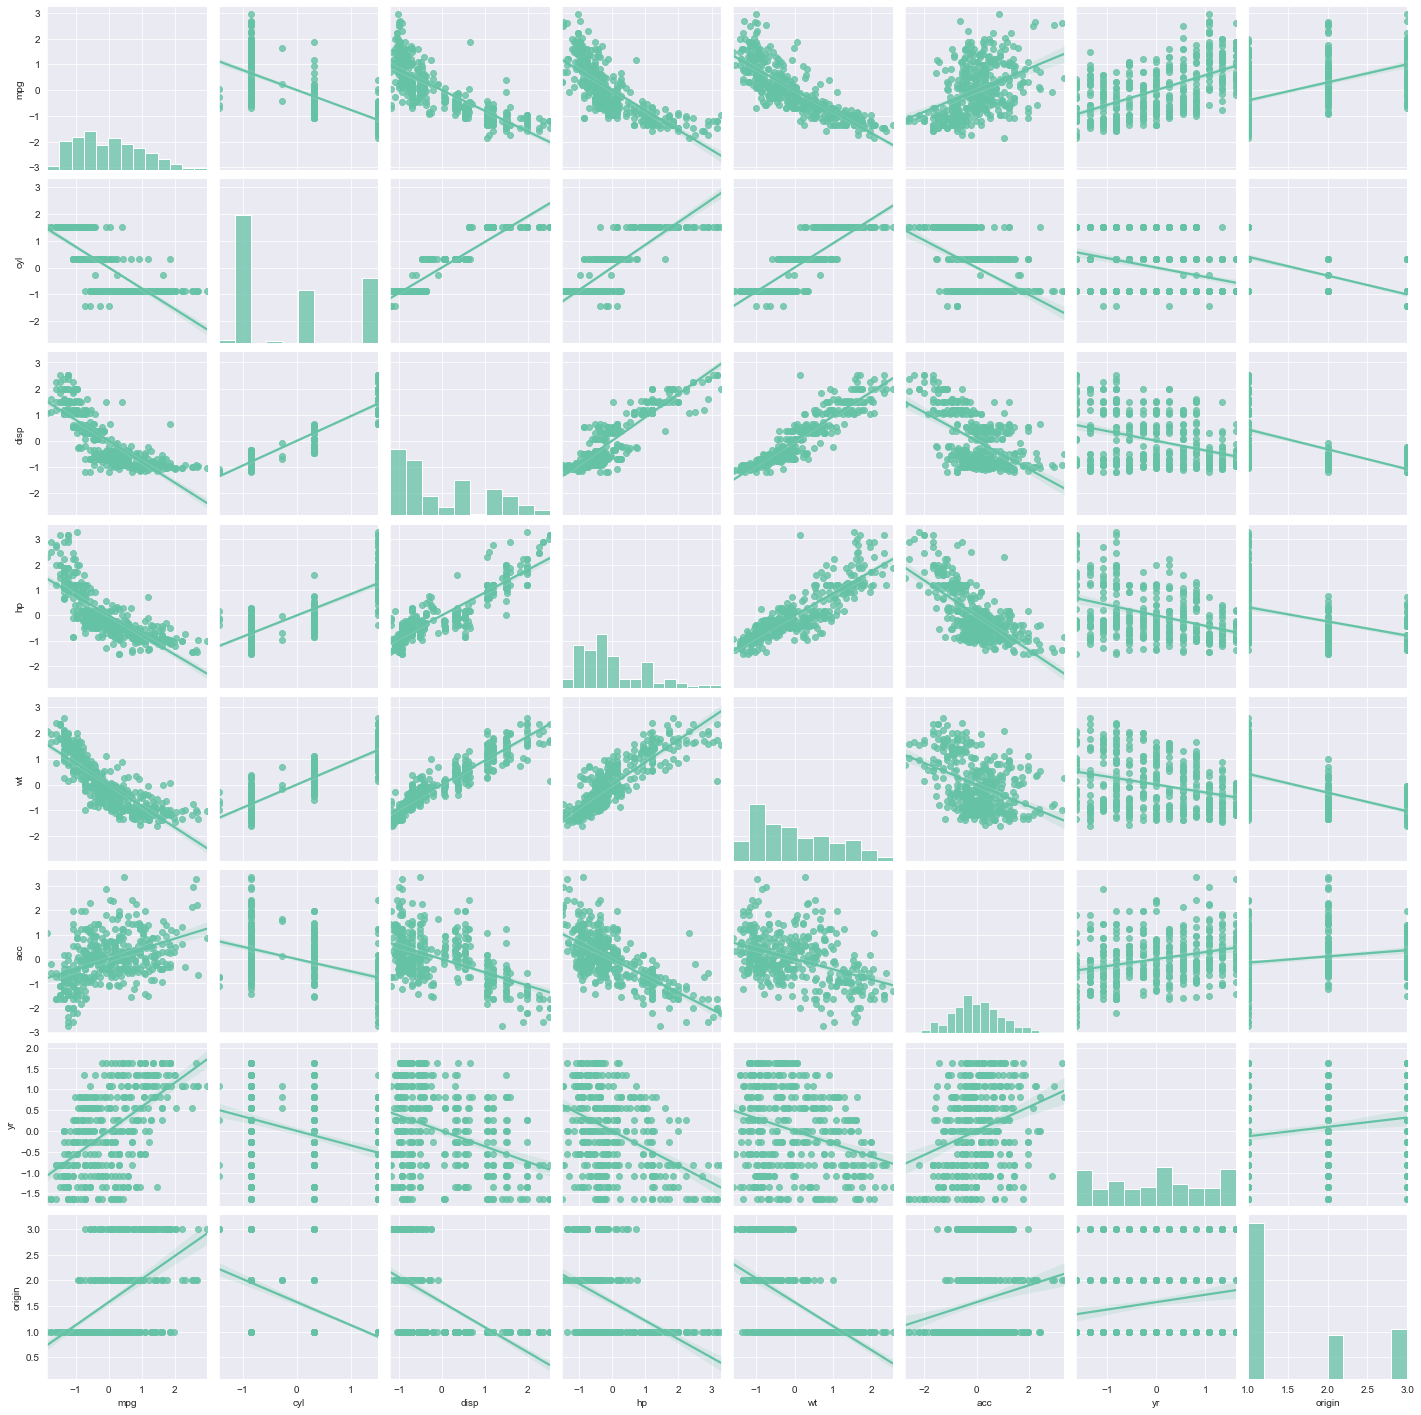

In [108]:
sns.pairplot(numerical_norm, kind="reg")  # plots scatter plots for every pair of attributes and histograms along the diagonal
plt.show()

<font size="5"><p style="color:black"> <b> 4. Machine learning:</p></font>

<span style="font-family: Arial; font-weight:bold;font-size:1.6em;color:#0000FF;">4.1 Use K Means and Hierarchical clustering to find out the optimal number of clusters in the data.

<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;">4.1.1 K Means clustering

### Elbow method for finding out the optimal number of clusters / k value

In [109]:
from scipy.spatial.distance import cdist
cluster_range = range( 2, 6 )   # expect 3 to four clusters from the pair panel visual inspection hence restricting from 2 to 6
cluster_errors = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 5)
  clusters.fit(model_normalized)
  labels = clusters.labels_
  centroids = clusters.cluster_centers_
  cluster_errors.append( clusters.inertia_ )
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df[0:15]

,num_clusters,cluster_errors
0,2,1492.024783
1,3,1120.268385
2,4,902.570552
3,5,794.093382


* Normalizing the clusters give a better representation of the dataset and hence the cluster errors are much higher

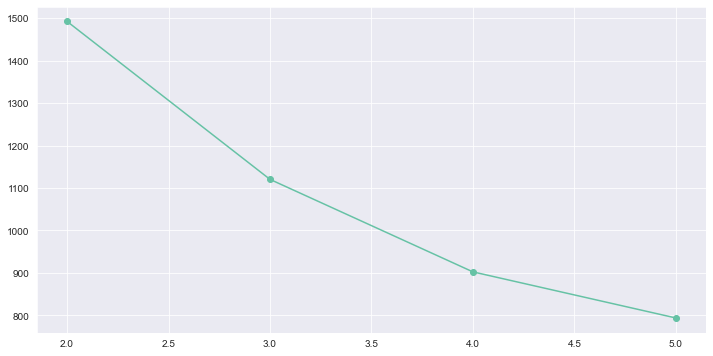

In [110]:
# Elbow plot

plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

### For K = 4

In [111]:
model_c4 = model_normalized.copy()
final_model2 = KMeans(n_clusters = 4)
final_model2.fit(model_c4)
prediction2=final_model2.predict(model_c4)

#Append the prediction 
model_c4["GROUP"] = prediction2
model_c4["GROUP"] = prediction2
print("Groups Assigned : \n")
model_c4

Groups Assigned : 



,mpg,cyl,disp,hp,wt,acc,yr,origin,GROUP
0,-0.706439,1.498191,1.090604,0.676651,0.630870,-1.295498,-1.627426,1,2
1,-1.090751,1.498191,1.503514,1.590708,0.854333,-1.477038,-1.627426,1,2
2,-0.706439,1.498191,1.196232,1.198970,0.550470,-1.658577,-1.627426,1,2
3,-0.962647,1.498191,1.061796,1.198970,0.546923,-1.295498,-1.627426,1,2
4,-0.834543,1.498191,1.042591,0.937811,0.565841,-1.840117,-1.627426,1,2
...,...,...,...,...,...,...,...,...,...
393,0.446497,-0.856321,-0.513026,-0.472449,-0.213324,0.011586,1.621983,1,3
394,2.624265,-0.856321,-0.925936,-1.360390,-0.993671,3.279296,1.621983,2,3
395,1.087017,-0.856321,-0.561039,-0.524680,-0.798585,-1.440730,1.621983,1,3
396,0.574601,-0.856321,-0.705077,-0.655260,-0.408411,1.100822,1.621983,1,3


In [112]:
model_cluster4 = model_c4.groupby(['GROUP'])
model_cluster4.mean()

,mpg,cyl,disp,hp,wt,acc,yr,origin
GROUP,,,,,,,,
0,0.202587,-0.838662,-0.815555,-0.546096,-0.758326,0.306769,-0.639064,2.080000
1,-0.495715,0.373846,0.306106,-0.072494,0.329492,0.355899,0.003364,1.056180
2,-1.158713,1.498191,1.500684,1.515110,1.400016,-1.076122,-0.672556,1.000000
3,1.174892,-0.804687,-0.774148,-0.726964,-0.758717,0.349822,1.118420,2.008772


array([[<AxesSubplot:title={'center':'acc'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'cyl'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'disp'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'hp'}, xlabel='[GROUP]'>],
       [<AxesSubplot:title={'center':'mpg'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'origin'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'wt'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'yr'}, xlabel='[GROUP]'>]],
      dtype=object)

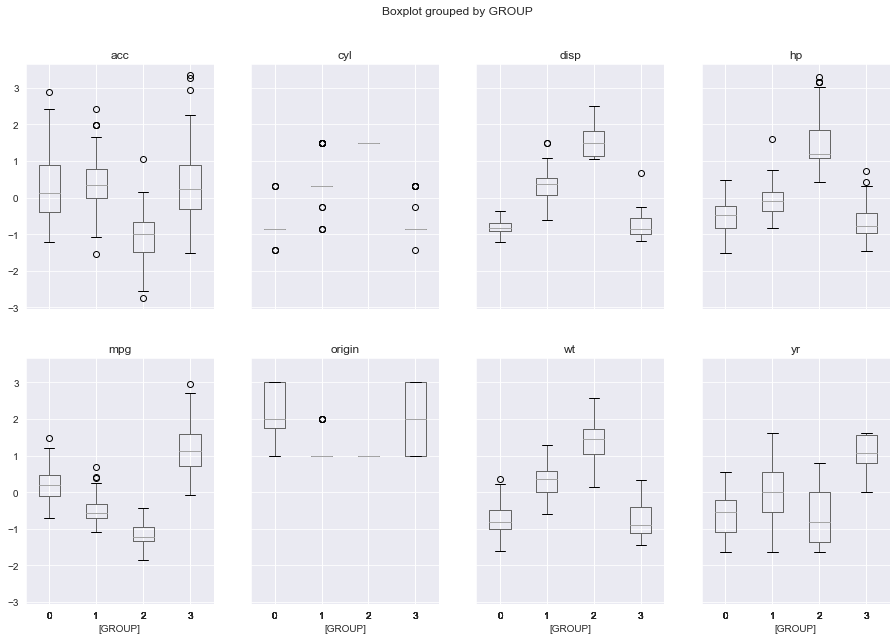

In [113]:
import matplotlib.pylab as plt

model_c4.boxplot(by = 'GROUP',  layout=(2,4), figsize=(15, 10))

In [114]:
# Calculating silhouette_score
silhouette_score(model_c4,prediction2)

0.4275764578655556

### For K = 3

In [115]:
model_c3 = model_normalized.copy()
final_model = KMeans(n_clusters = 3)
final_model.fit(model_c3)
prediction=final_model.predict(model_c3)

#Append the prediction 
model_c3["GROUP"] = prediction
model_c3["GROUP"] = prediction
print("Groups Assigned : \n")
model_c3

Groups Assigned : 



,mpg,cyl,disp,hp,wt,acc,yr,origin,GROUP
0,-0.706439,1.498191,1.090604,0.676651,0.630870,-1.295498,-1.627426,1,2
1,-1.090751,1.498191,1.503514,1.590708,0.854333,-1.477038,-1.627426,1,2
2,-0.706439,1.498191,1.196232,1.198970,0.550470,-1.658577,-1.627426,1,2
3,-0.962647,1.498191,1.061796,1.198970,0.546923,-1.295498,-1.627426,1,2
4,-0.834543,1.498191,1.042591,0.937811,0.565841,-1.840117,-1.627426,1,2
...,...,...,...,...,...,...,...,...,...
393,0.446497,-0.856321,-0.513026,-0.472449,-0.213324,0.011586,1.621983,1,1
394,2.624265,-0.856321,-0.925936,-1.360390,-0.993671,3.279296,1.621983,2,1
395,1.087017,-0.856321,-0.561039,-0.524680,-0.798585,-1.440730,1.621983,1,1
396,0.574601,-0.856321,-0.705077,-0.655260,-0.408411,1.100822,1.621983,1,1


In [116]:
model_cluster3 = model_c3.groupby(['GROUP'])
model_cluster3.mean()

,mpg,cyl,disp,hp,wt,acc,yr,origin
GROUP,,,,,,,,
0,-0.525055,0.427959,0.329600,-0.036788,0.341572,0.304937,-0.045801,1.090909
1,0.720379,-0.826344,-0.788766,-0.647643,-0.750201,0.348442,0.318208,2.018519
2,-1.163797,1.498191,1.503923,1.522640,1.404098,-1.086149,-0.688324,1.000000


array([[<AxesSubplot:title={'center':'acc'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'cyl'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'disp'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'hp'}, xlabel='[GROUP]'>],
       [<AxesSubplot:title={'center':'mpg'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'origin'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'wt'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'yr'}, xlabel='[GROUP]'>]],
      dtype=object)

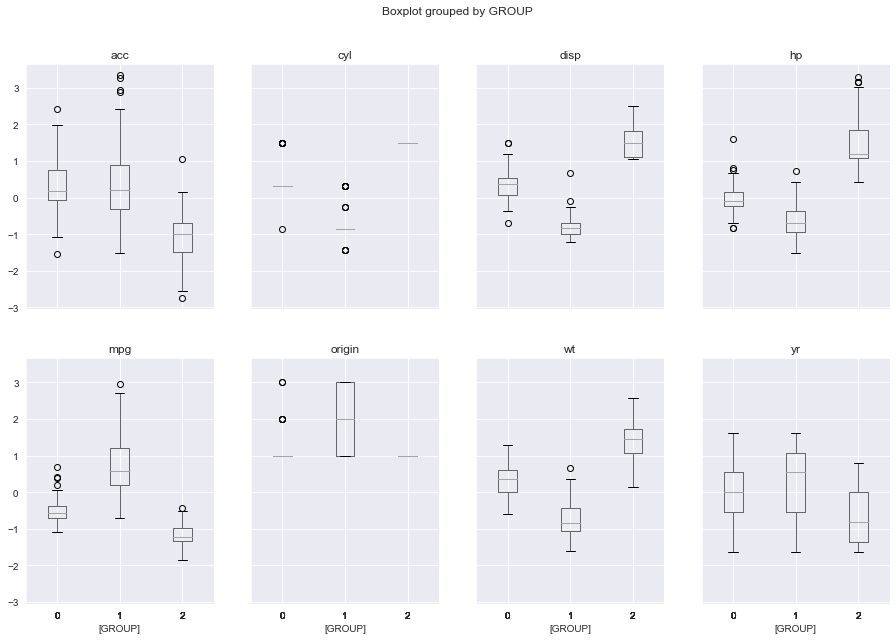

In [117]:
import matplotlib.pylab as plt

model_c3.boxplot(by = 'GROUP',  layout=(2,4), figsize=(15, 10))

* From the bar plot we can understand that:

> Group 0 : lowest acceleration, highest displacement/engine volume, highest horsepower, lowest miles per gallon (least efficient fuel consumption) , highest weight, oldest model in year. 

> Group 1 : highest acceleration, lowest displacement/engine volume, lowest horsepower, highest miles per gallon (most efficient fuel consumption) , lowest weight, moderate model in year.  

> Group 2 : moderate acceleration, moderate displacement/engine volume, moderate horsepower, moderate miles per gallon (moderately efficient fuel consumption) , moderate weight, latest model in year.   

* The pattern is clearly indicating that:

> Group 0 is the larger vehicles with high engine volume/displacement and weight. (oldest)

> Group 1 is the smaller vehicle with lowest engine volume/displacement and weight. (in between)

> Group 2 is the medium vehicle with moderate engine volume/displacement and weight. (latest)

The groups even though they are distinct, can be classified into 3 which is high, medium and low.

In [118]:
# Calculating silhouette_score
silhouette_score(model_c3,prediction)

0.38300660106956763

#### Here, since Sillhouette score is higher for K = 3, hence we will select 3 clusters to be the optimal number of clusters for Kmeans clustering.

<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;">4.1.2 Hierarchical clustering

In [119]:
car_name = a[['car_name']]

In [120]:
Merge_car_name = pd.merge(car_name_OG,car_name,left_index=True, right_index=True)

In [121]:
Hier_model = pd.merge(model_normalized,Merge_car_name,left_index=True, right_index=True)

In [122]:
Hier_model

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_name_x,car_name_y
0,-0.706439,1.498191,1.090604,0.676651,0.630870,-1.295498,-1.627426,1,chevrolet chevelle malibu,chev
1,-1.090751,1.498191,1.503514,1.590708,0.854333,-1.477038,-1.627426,1,buick skylark 320,buic
2,-0.706439,1.498191,1.196232,1.198970,0.550470,-1.658577,-1.627426,1,plymouth satellite,plym
3,-0.962647,1.498191,1.061796,1.198970,0.546923,-1.295498,-1.627426,1,amc rebel sst,amc
4,-0.834543,1.498191,1.042591,0.937811,0.565841,-1.840117,-1.627426,1,ford torino,ford
...,...,...,...,...,...,...,...,...,...,...
393,0.446497,-0.856321,-0.513026,-0.472449,-0.213324,0.011586,1.621983,1,ford mustang gl,ford
394,2.624265,-0.856321,-0.925936,-1.360390,-0.993671,3.279296,1.621983,2,vw pickup,volk
395,1.087017,-0.856321,-0.561039,-0.524680,-0.798585,-1.440730,1.621983,1,dodge rampage,dodg
396,0.574601,-0.856321,-0.705077,-0.655260,-0.408411,1.100822,1.621983,1,ford ranger,ford


In [123]:
labelList = np.array(Hier_model.car_name_y)
labelList

array(['chev', 'buic', 'plym', 'amc ', 'ford', 'ford', 'chev', 'plym',
       'pont', 'amc ', 'dodg', 'plym', 'chev', 'buic', 'toyo', 'plym',
       'amc ', 'ford', 'dats', 'volk', 'peug', 'audi', 'saab', 'bmw ',
       'amc ', 'ford', 'chev', 'dodg', 'hi 1', 'dats', 'chev', 'toyo',
       'ford', 'amc ', 'plym', 'chev', 'ford', 'amc ', 'chev', 'pont',
       'ford', 'plym', 'dodg', 'ford', 'pont', 'amc ', 'chev', 'pont',
       'ford', 'merc', 'opel', 'peug', 'fiat', 'toyo', 'dats', 'volk',
       'plym', 'toyo', 'dodg', 'volk', 'chev', 'ford', 'chev', 'pont',
       'plym', 'ford', 'amc ', 'merc', 'buic', 'olds', 'chry', 'mazd',
       'amc ', 'chev', 'ford', 'plym', 'volv', 'volk', 'peug', 'rena',
       'ford', 'dats', 'toyo', 'dodg', 'toyo', 'buic', 'amc ', 'chev',
       'ford', 'dodg', 'merc', 'chev', 'ford', 'plym', 'chry', 'buic',
       'amc ', 'plym', 'chev', 'amc ', 'ford', 'plym', 'volk', 'chev',
       'ford', 'plym', 'olds', 'amc ', 'toyo', 'chev', 'dats', 'mazd',
      

In [124]:
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
from sklearn.cluster import AgglomerativeClustering 
from scipy.spatial.distance import pdist 
from sklearn.datasets import load_iris

#### i) Average linkage method

In [125]:
Z = linkage(Hier_model.iloc[:,0:8], method='average')
c, coph_dists = cophenet(Z , pdist(Hier_model.iloc[:,0:5]))

c

0.7987632851055403

#### ii) Complete linkage method

In [126]:
Z1 = linkage(Hier_model.iloc[:,0:8], method='complete')
c1, coph_dists1 = cophenet(Z1 , pdist(Hier_model.iloc[:,0:5]))

c1

0.7407883766712355

#### iii) Ward linkage method

In [127]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Z2 = linkage(Hier_model.iloc[:,0:8], method='ward')
c2, coph_dists2 = cophenet(Z2 , pdist(Hier_model.iloc[:,0:5]))

c2

0.7287243787671743

#### iv) Single linkage method

In [128]:
Z3 = linkage(Hier_model.iloc[:,0:8], method='single')
c3, coph_dists3 = cophenet(Z3 , pdist(Hier_model.iloc[:,0:5]))

c3

0.6187775468707812

#### v) Weighted linkage method

In [129]:
Z4 = linkage(Hier_model.iloc[:,0:8], method='weighted')
c4, coph_dists4 = cophenet(Z4 , pdist(Hier_model.iloc[:,0:5]))

c4

0.664356964094981

#### The linkage with the highest cophenetic coefficient is selected, here Z has the highest which is using average linkage method

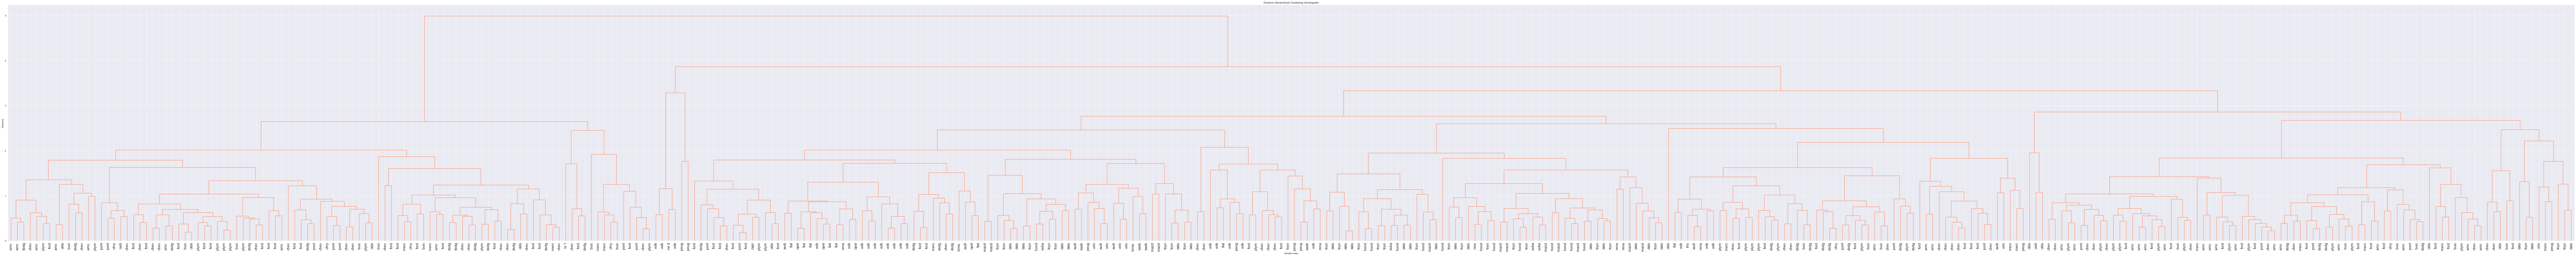

In [130]:
plt.figure(figsize=(150, 15))
plt.title('Divisive Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,labels = labelList,color_threshold = 40, leaf_font_size=15)
plt.tight_layout()

### For Cluster = 4

#### Here in divisive hierarchical clustering, we are Cutting dendogram at 4 clusters 

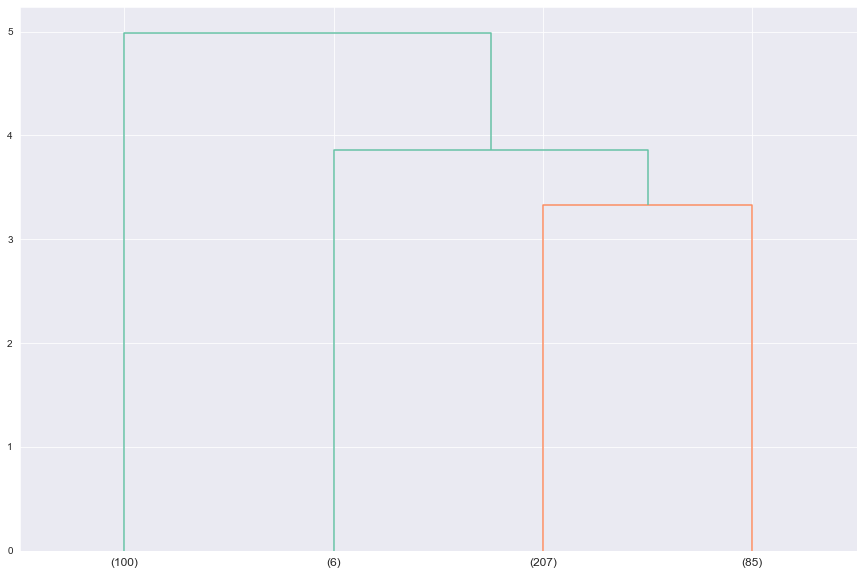

In [131]:
plt.figure(figsize=(15, 10))
dend = dendrogram(Z,
                 truncate_mode='lastp',
                 p = 4,
                 labels = labelList 
                 )

In [132]:
GROUP = fcluster(Z, 4, criterion='maxclust')
GROUP

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 4, 4, 4, 3, 3, 3, 3,
       3, 3, 4, 1, 1, 1, 1, 3, 3, 3, 3, 4, 4, 4, 4, 4, 1, 1, 1, 1, 1, 1,
       1, 4, 3, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 4, 4, 4, 3, 1, 1, 1, 1, 4, 3, 3,
       3, 3, 3, 4, 3, 1, 1, 3, 3, 3, 3, 1, 3, 4, 1, 4, 4, 4, 4, 3, 3, 3,
       3, 4, 4, 4, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4,
       4, 4, 1, 1, 1, 1, 4, 4, 4, 4, 4, 1, 1, 3, 3, 4, 3, 3, 3, 3, 4, 3,
       4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 4, 4, 4, 4, 3, 3, 3,
       3, 4, 4, 4, 4, 3, 3, 3, 3, 3, 1, 2, 4, 4, 1, 1, 1, 1, 3, 3, 3, 3,
       3, 1, 4, 1, 1, 4, 4, 4, 4, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 4,
       3, 3, 2, 3, 3, 3, 3, 1, 1, 1, 4, 4, 4, 3, 4, 4, 4, 4, 4, 4, 1, 1,
       1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 4, 3, 3, 4, 4, 3, 4, 4, 1,
       1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 4, 2, 4,

In [133]:
Hier_model_8 = Hier_model.copy()
Hier_model_8['GROUP'] = GROUP
Hier_model_8.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_name_x,car_name_y,GROUP
0,-0.706439,1.498191,1.090604,0.676651,0.630870,-1.295498,-1.627426,1,chevrolet chevelle malibu,chev,1
1,-1.090751,1.498191,1.503514,1.590708,0.854333,-1.477038,-1.627426,1,buick skylark 320,buic,1
2,-0.706439,1.498191,1.196232,1.198970,0.550470,-1.658577,-1.627426,1,plymouth satellite,plym,1
3,-0.962647,1.498191,1.061796,1.198970,0.546923,-1.295498,-1.627426,1,amc rebel sst,amc,1
4,-0.834543,1.498191,1.042591,0.937811,0.565841,-1.840117,-1.627426,1,ford torino,ford,1


In [134]:
Hier_model_8.GROUP.value_counts().sort_index()

1    100
2      6
3    207
4     85
Name: GROUP, dtype: int64

In [135]:
aggdata8=Hier_model_8.iloc[:,1:13].groupby('GROUP').mean()
aggdata8['Freq']=Hier_model_8.GROUP.value_counts().sort_index()
aggdata8

,cyl,disp,hp,wt,acc,yr,origin,Freq
GROUP,,,,,,,,
1,1.486419,1.460015,1.470575,1.361038,-1.040617,-0.614694,1.000000,100
2,-0.856321,-0.852317,-1.173226,-0.557189,2.710472,0.854762,2.000000,6
3,-0.847790,-0.794956,-0.646933,-0.765016,0.300646,0.282452,2.000000,207
4,0.376336,0.278452,-0.071800,0.301149,0.300767,-0.025021,1.176471,85


array([[<AxesSubplot:title={'center':'acc'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'cyl'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'disp'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'hp'}, xlabel='[GROUP]'>],
       [<AxesSubplot:title={'center':'mpg'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'origin'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'wt'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'yr'}, xlabel='[GROUP]'>]],
      dtype=object)

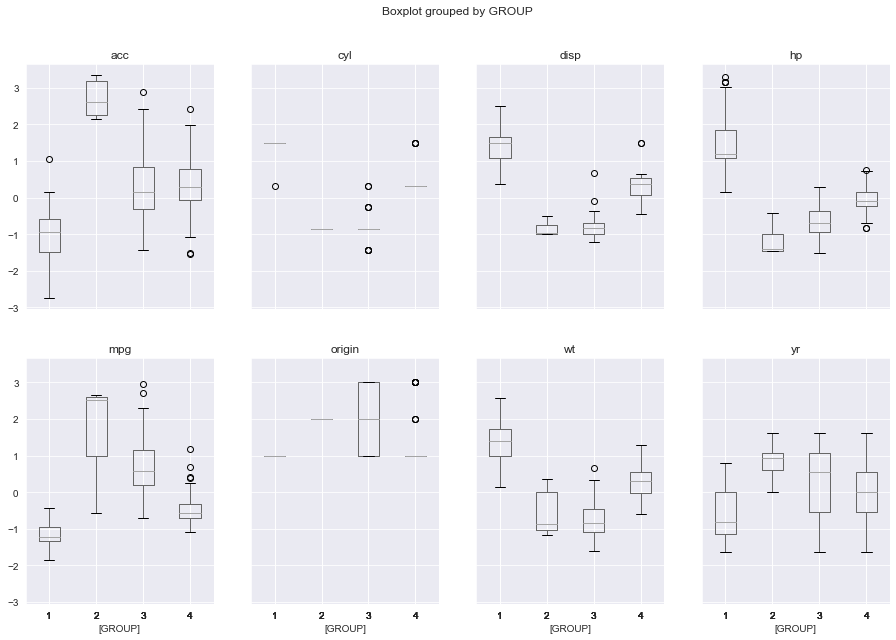

In [136]:
import matplotlib.pylab as plt

Hier_model_8.boxplot(by = 'GROUP',  layout=(2,4), figsize=(15, 10))

### For Cluster = 3

#### Here in divisive hierarchical clustering, we are Cutting dendogram at 3 clusters 

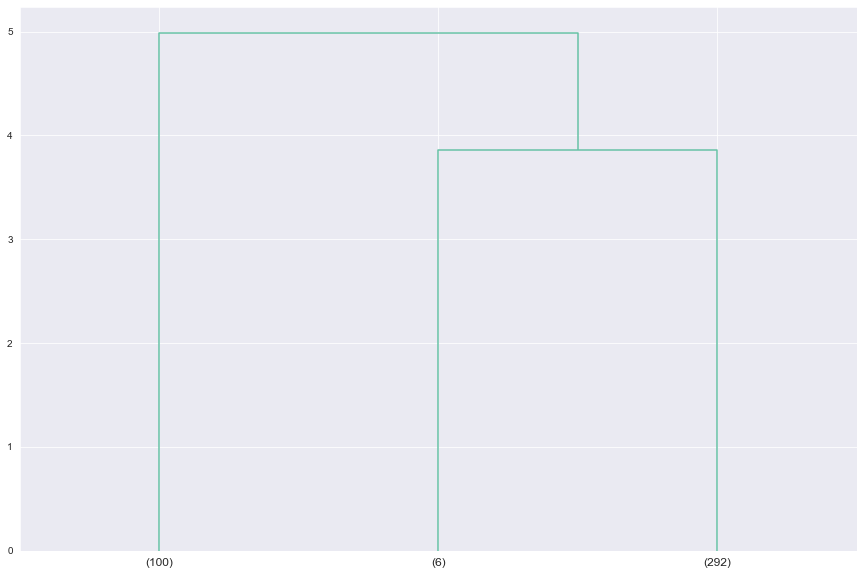

In [137]:
plt.figure(figsize=(15, 10))
dend = dendrogram(Z,
                 truncate_mode='lastp',
                 p = 3,
                 labels = labelList 
                 )

In [138]:
GROUP = fcluster(Z, 3, criterion='maxclust')
GROUP

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1,
       1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 3, 3, 3,
       3, 3, 3, 3, 3, 1, 1, 3, 3, 3, 3, 1, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 1, 1, 1, 1, 3, 3, 3, 3, 3, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 2, 3, 3, 1, 1, 1, 1, 3, 3, 3, 3,
       3, 1, 3, 1, 1, 3, 3, 3, 3, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 2, 3, 3, 3, 3, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1,
       1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1,
       1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 2, 3,

In [139]:
Hier_model_7 = Hier_model.copy()
Hier_model_7['GROUP'] = GROUP
Hier_model_7.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_name_x,car_name_y,GROUP
0,-0.706439,1.498191,1.090604,0.676651,0.630870,-1.295498,-1.627426,1,chevrolet chevelle malibu,chev,1
1,-1.090751,1.498191,1.503514,1.590708,0.854333,-1.477038,-1.627426,1,buick skylark 320,buic,1
2,-0.706439,1.498191,1.196232,1.198970,0.550470,-1.658577,-1.627426,1,plymouth satellite,plym,1
3,-0.962647,1.498191,1.061796,1.198970,0.546923,-1.295498,-1.627426,1,amc rebel sst,amc,1
4,-0.834543,1.498191,1.042591,0.937811,0.565841,-1.840117,-1.627426,1,ford torino,ford,1


In [140]:
Hier_model_7.GROUP.value_counts().sort_index()

1    100
2      6
3    292
Name: GROUP, dtype: int64

In [141]:
aggdata7=Hier_model_7.iloc[:,1:13].groupby('GROUP').mean()
aggdata7['Freq']=Hier_model_7.GROUP.value_counts().sort_index()
aggdata7

,cyl,disp,hp,wt,acc,yr,origin,Freq
GROUP,,,,,,,,
1,1.486419,1.460015,1.470575,1.361038,-1.040617,-0.614694,1.000000,100
2,-0.856321,-0.852317,-1.173226,-0.557189,2.710472,0.854762,2.000000,6
3,-0.491452,-0.482492,-0.479514,-0.454660,0.300681,0.192948,1.760274,292


array([[<AxesSubplot:title={'center':'acc'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'cyl'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'disp'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'hp'}, xlabel='[GROUP]'>],
       [<AxesSubplot:title={'center':'mpg'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'origin'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'wt'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'yr'}, xlabel='[GROUP]'>]],
      dtype=object)

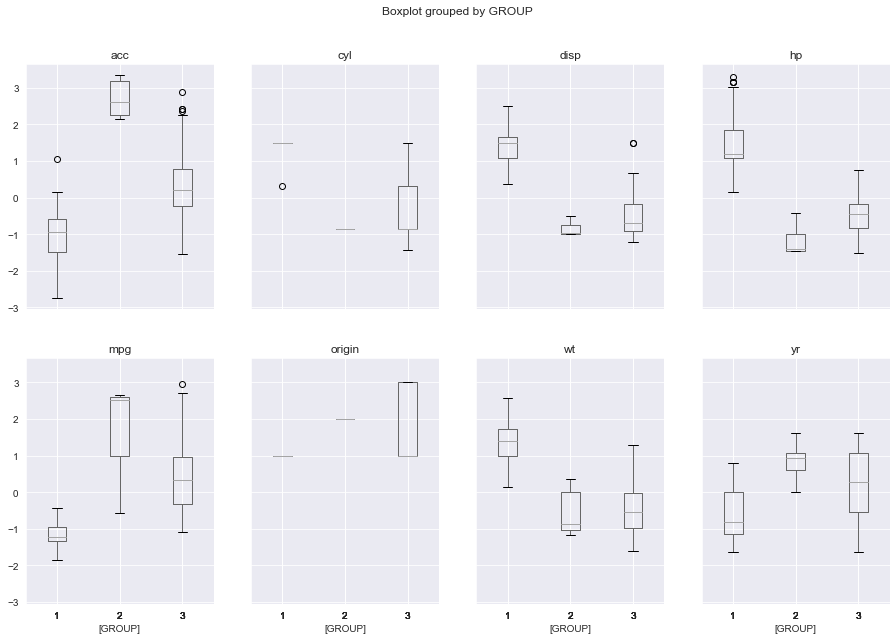

In [142]:
import matplotlib.pylab as plt

Hier_model_7.boxplot(by = 'GROUP',  layout=(2,4), figsize=(15, 10))

* From the bar plot we can understand that:

> Group 1 :lowest acceleration, highest displacement/engine volume, highest horsepower, lowest miles per gallon (least efficient fuel consumption) , highest weight, oldest model in year.  

> Group 2 : highest acceleration, lowest displacement/engine volume, lowest horsepower, highest miles per gallon (most efficient fuel consumption) , lowest weight, moderate model in year.

> Group 3 : moderate acceleration, moderate displacement/engine volume, moderate horsepower, moderate miles per gallon (moderate fuel consumption) , moderate weight, latest model in year. 

* The pattern is clearly indicating that:

> Group 1 is the larger vehicles with high engine volume/displacement and weight. (oldest)

> Group 2 is the smaller vehicle with lowest engine volume/displacement and weight. (in between)

> Group 3 is the medium vehicle with moderate engine volume/displacement and weight. (latest)

The groups even though they are distinct, can be classified into 3 which is high, medium and low.

#### Here, we have selected 3 clusters to be the optimal number of clusters as 4 clusters has the same number of datapoints but segregated into 4 clusters and they were not that distinct

<span style="font-family: Arial; font-weight:bold;font-size:1.6em;color:#0000FF;">4.2 Share your insights about the difference in using these two methods.

<font size="3">• The insights for the two clustering methods are as follows:</font>

<font size="3"><b>1) Heirarchical clustering</b>

> • The Heirarchical clustering method gives all clusters possible and it can be visualized in a tree structure known as dendogram.  The dendogram can be cut at a specific point and  the necessary cluster can be extracted. There are 5 linkage methods and to validate the linkage method, we use the cophenetic coefficient to check the accuracy of the clusters formed to the original dataset. The higher the coefficient value, the better the cluster accuracy, out of which it was found that average based linkage method had the highest cophenetic coefficient, hence it was selected for clustering.
    
> • The number of clusters selected was 3 because it had more records with 3 clusters than 4 clusters. This was because the cophenetic coefficient selected for the model had good clustering, resulting in more data fitting into 3 clusters than 4.
    
> • From the Heirarachical clustering, we can understand that the 3 clusters signify 3 different vehicle types: small, moderate and large vehicles.
    
<font size="3"><b>2) K means clustering</b>
    
> • The K means clustering method assigns a datapoint to a centroid K, and the K value is pre defined. The K value is estimated using elbow method, it is not a very accurate method, however,it is still preferred as it is better than assigning a random value. Here, after estimating the K value, the clusters are grouped with K means algorithm. The clusters are validated using silhouette coefficient/score, which measures the distance between datapoints and centroid to understand the best number of clusters for the dataset. 
    
> • The clustering was performed for 3 and 4 clusters, and the sillhouette score was used to determine the number of clusters to be selected for the dataset. It was observed that 3 clusters had more sillhouette score than 4 clusters. Hence, the optimal number of clusters for heirarchical clustering is 3. 
    
> • From the K means clustering, we can understand that the 3 clusters signify 3 different vehicle types: small, medium and large vehicles
     
<font size="3"><b>3) Conclusion </b>

> • The 2 methods are very different, as one is computationally expensive which forms all the clusters and the other needs the  number of clusters to be predefined. 
    
> • The 2 methods though they are different, they had the exact pattern in different arrangement of groups. The K means and Heirarchical clustering have an optimal value of 3 clusters. 
    
This is the observed pattern from the box plot
    
* For Heirarchical Clustering and K means Clustering: 
    
> Group 0 is the larger vehicles with high engine volume/displacement and weight. (oldest)

> Group 1 is the smaller vehicle with lowest engine volume/displacement and weight. (in between)

> Group 2 is the medium vehicle with moderate engine volume/displacement and weight. (latest)
    
The boxplots for both the clustering techniques were compared and they have the same identical pattern and in the same order of groups/clusters. This means that both methods have unique approaches in reaching the exact conclusion. The heirarchical clustering method even though it is computationally expensive, it is preferred in businesses as the variables can be correlated and conclusion can be determined from the dendogram. Both methods are useful in this case and can be utilized for creation of clusters for a dataset. 
      
</font>

<font size="5"><p style="color:black"> <b> 5. Answer below questions based on outcomes of using ML based methods.:</p></font>

<span style="font-family: Arial; font-weight:bold;font-size:1.6em;color:#0000FF;">5.1 Mention how many optimal clusters are present in the data and what could be the possible reason behind it.

<font size="3"> • There are 3 optimal clusters in the dataset, this is from a 7 dimensional dataset. The box plots from both the clustering methods depicted identical patterns. This meant that the dataset has distinct groups, these hidden patterns were estimated by the machine learning unsupervised clustering algorithms which would normally be highly time consuming to understand/identify.

• The optimal clusters for Heirarchical clustering and K means clustering is as follows: 

> Group 0 : lowest acceleration, highest displacement/engine volume, highest horsepower, lowest miles per gallon (least efficient fuel consumption) , highest weight, oldest model in year. 

> Group 1 : highest acceleration, lowest displacement/engine volume, lowest horsepower, highest miles per gallon (most efficient fuel consumption) , lowest weight, moderate model in year.  

> Group 2 : moderate acceleration, moderate displacement/engine volume, moderate horsepower, moderate miles per gallon (moderately efficient fuel consumption) , moderate weight, latest model in year.
    
</font>

In [143]:
Cluster_analysisK = model_c3[['GROUP']]
Cluster_analysisK1 = Cluster_analysisK[Cluster_analysisK.GROUP==0].reset_index()
Cluster_analysisK1 = Cluster_analysisK1.drop('index', axis = 1)
Cluster_analysisK2 = Cluster_analysisK[Cluster_analysisK.GROUP==1].reset_index()
Cluster_analysisK2 = Cluster_analysisK2.drop('index', axis = 1)
Cluster_analysisK3 = Cluster_analysisK[Cluster_analysisK.GROUP==2].reset_index()
Cluster_analysisK3 = Cluster_analysisK3.drop('index', axis = 1)

In [144]:
Cluster_analysis = Hier_model_7[['GROUP','car_name_x','car_name_y']]
Cluster_analysis1 = Cluster_analysis[Cluster_analysis.GROUP==1].reset_index()
Cluster_analysis1 = Cluster_analysis1.drop('index', axis = 1)
Cluster_analysis2 = Cluster_analysis[Cluster_analysis.GROUP==2].reset_index()
Cluster_analysis2 = Cluster_analysis2.drop('index', axis = 1)
Cluster_analysis3 = Cluster_analysis[Cluster_analysis.GROUP==3].reset_index()
Cluster_analysis3 = Cluster_analysis3.drop('index', axis = 1)

<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;">5.1.1 Cluster 1 details (Large car - least mpg)
    

#### K means Clustering - Cluster 1

In [145]:
Cluster_analysisK1

,GROUP
0,0
1,0
2,0
3,0
4,0
...,...
83,0
84,0
85,0
86,0


#### Heirarchical Clustering - Cluster 1

In [146]:
Cluster_analysis1

,GROUP,car_name_x,car_name_y
0,1,chevrolet chevelle malibu,chev
1,1,buick skylark 320,buic
2,1,plymouth satellite,plym
3,1,amc rebel sst,amc
4,1,ford torino,ford
...,...,...,...
95,1,dodge st. regis,dodg
96,1,buick estate wagon (sw),buic
97,1,ford country squire (sw),ford
98,1,chevrolet malibu classic (sw),chev


In [147]:
Cluster_analysis1['car_name_y'].value_counts()

ford    20
chev    20
dodg    12
plym    10
amc      8
buic     8
pont     7
merc     5
chry     4
olds     4
cadi     1
hi 1     1
Name: car_name_y, dtype: int64

<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;">5.1.2 Cluster 2 details (Small car - highest mpg)
    

#### K means Clustering - Cluster 2

In [148]:
Cluster_analysisK2

,GROUP
0,1
1,1
2,1
3,1
4,1
...,...
211,1
212,1
213,1
214,1


#### Heirarchical Clustering - Cluster 2

In [149]:
Cluster_analysis2

,GROUP,car_name_x,car_name_y
0,2,peugeot 504,peug
1,2,volkswagen rabbit custom diesel,volk
2,2,peugeot 504,peug
3,2,vw rabbit c (diesel),volk
4,2,vw dasher (diesel),vw d
5,2,vw pickup,volk


In [150]:
Cluster_analysis2['car_name_y'].value_counts()

volk    3
peug    2
vw d    1
Name: car_name_y, dtype: int64

<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;">5.1.3 Cluster 3 details (Medium car - moderate mpg)
    

#### K means Clustering - Cluster 3

In [151]:
Cluster_analysisK3

,GROUP
0,2
1,2
2,2
3,2
4,2
...,...
89,2
90,2
91,2
92,2


#### Heirarchical Clustering - Cluster 3

In [152]:
Cluster_analysis3

,GROUP,car_name_x,car_name_y
0,3,toyota corona mark ii,toyo
1,3,plymouth duster,plym
2,3,amc hornet,amc
3,3,ford maverick,ford
4,3,datsun pl510,dats
...,...,...,...
287,3,chevrolet camaro,chev
288,3,ford mustang gl,ford
289,3,dodge rampage,dodg
290,3,ford ranger,ford


In [153]:
Cluster_analysis3['car_name_y'].value_counts()

ford    31
chev    27
toyo    26
dats    23
plym    21
amc     20
volk    18
dodg    16
hond    13
mazd    11
pont     9
merc     9
buic     9
fiat     8
audi     7
peug     6
volv     6
olds     6
rena     5
suba     4
saab     4
opel     4
bmw      2
chry     2
cadi     1
niss     1
capr     1
maxd     1
triu     1
Name: car_name_y, dtype: int64

<font size="3"> • The observations from the following clusters is as follows: 
    
> Cluster 1 has Large car - least mpg
    
> Cluster 2 has Small car - highest mpg
    
> Cluster 3 has Medium car - moderate mpg </font>

<span style="font-family: Arial; font-weight:bold;font-size:1.6em;color:#0000FF;">5.2 Use linear regression model on different clusters separately and print the coefficients of the models individually

<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;">5.2.1 Dataset without clustering

In [154]:
Combined_Linreg_cluster_dataset = model_c3.drop(['GROUP'],axis = 1)
Combined_Linreg_cluster_dataset

,mpg,cyl,disp,hp,wt,acc,yr,origin
0,-0.706439,1.498191,1.090604,0.676651,0.630870,-1.295498,-1.627426,1
1,-1.090751,1.498191,1.503514,1.590708,0.854333,-1.477038,-1.627426,1
2,-0.706439,1.498191,1.196232,1.198970,0.550470,-1.658577,-1.627426,1
3,-0.962647,1.498191,1.061796,1.198970,0.546923,-1.295498,-1.627426,1
4,-0.834543,1.498191,1.042591,0.937811,0.565841,-1.840117,-1.627426,1
...,...,...,...,...,...,...,...,...
393,0.446497,-0.856321,-0.513026,-0.472449,-0.213324,0.011586,1.621983,1
394,2.624265,-0.856321,-0.925936,-1.360390,-0.993671,3.279296,1.621983,2
395,1.087017,-0.856321,-0.561039,-0.524680,-0.798585,-1.440730,1.621983,1
396,0.574601,-0.856321,-0.705077,-0.655260,-0.408411,1.100822,1.621983,1


In [155]:
cmblrg = Combined_Linreg_cluster_dataset.drop('mpg',axis = 1)
cmby = Combined_Linreg_cluster_dataset[['mpg']]

In [156]:
cmblrg

,cyl,disp,hp,wt,acc,yr,origin
0,1.498191,1.090604,0.676651,0.630870,-1.295498,-1.627426,1
1,1.498191,1.503514,1.590708,0.854333,-1.477038,-1.627426,1
2,1.498191,1.196232,1.198970,0.550470,-1.658577,-1.627426,1
3,1.498191,1.061796,1.198970,0.546923,-1.295498,-1.627426,1
4,1.498191,1.042591,0.937811,0.565841,-1.840117,-1.627426,1
...,...,...,...,...,...,...,...
393,-0.856321,-0.513026,-0.472449,-0.213324,0.011586,1.621983,1
394,-0.856321,-0.925936,-1.360390,-0.993671,3.279296,1.621983,2
395,-0.856321,-0.561039,-0.524680,-0.798585,-1.440730,1.621983,1
396,-0.856321,-0.705077,-0.655260,-0.408411,1.100822,1.621983,1


In [157]:
cmby

,mpg
0,-0.706439
1,-1.090751
2,-0.706439
3,-0.962647
4,-0.834543
...,...
393,0.446497
394,2.624265
395,1.087017
396,0.574601


In [158]:
cmby.size

398

In [159]:
cmby.shape

(398, 1)

In [160]:
cmblrg.size

2786

In [161]:
cmblrg.shape

(398, 7)

In [162]:
X_train, X_test, y_train, y_test = train_test_split(cmblrg, cmby, train_size = 0.70,test_size=0.30, random_state=1)

<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;">5.2.3 Dataset from 1st cluster

In [163]:
Kmeans_Cluster1 = model_c3[model_c3.GROUP==0].reset_index()
Kmeans_Cluster1

,index,mpg,cyl,disp,hp,wt,acc,yr,origin,GROUP
0,15,-0.194023,0.320935,0.043923,-0.237405,-0.162483,-0.024722,-1.627426,1,0
1,16,-0.706439,0.320935,0.053526,-0.185174,-0.232242,-0.024722,-1.627426,1,0
2,17,-0.322127,0.320935,0.063128,-0.498565,-0.453340,0.156817,-1.627426,1,0
3,24,-0.322127,0.320935,0.053526,-0.367985,-0.381217,-0.206262,-1.627426,1,0
4,33,-0.578335,0.320935,0.370411,-0.106826,-0.397770,-0.932419,-1.356642,1,0
...,...,...,...,...,...,...,...,...,...,...
83,364,0.395255,1.498191,1.503514,0.023754,0.892168,1.246054,1.351199,1,0
84,365,-0.424610,0.320935,0.063128,-0.420217,0.105909,0.556204,1.351199,1,0
85,366,-0.757680,0.320935,0.303193,-0.498565,0.584758,0.374665,1.351199,1,0
86,386,0.190289,0.320935,-0.119320,0.154333,-0.030061,0.302049,1.621983,1,0


In [164]:
KC1 = Kmeans_Cluster1.drop(['GROUP','mpg','index'],axis = 1)
KC1

,cyl,disp,hp,wt,acc,yr,origin
0,0.320935,0.043923,-0.237405,-0.162483,-0.024722,-1.627426,1
1,0.320935,0.053526,-0.185174,-0.232242,-0.024722,-1.627426,1
2,0.320935,0.063128,-0.498565,-0.453340,0.156817,-1.627426,1
3,0.320935,0.053526,-0.367985,-0.381217,-0.206262,-1.627426,1
4,0.320935,0.370411,-0.106826,-0.397770,-0.932419,-1.356642,1
...,...,...,...,...,...,...,...
83,1.498191,1.503514,0.023754,0.892168,1.246054,1.351199,1
84,0.320935,0.063128,-0.420217,0.105909,0.556204,1.351199,1
85,0.320935,0.303193,-0.498565,0.584758,0.374665,1.351199,1
86,0.320935,-0.119320,0.154333,-0.030061,0.302049,1.621983,1


In [165]:
y = Kmeans_Cluster1[['mpg']]
y

,mpg
0,-0.194023
1,-0.706439
2,-0.322127
3,-0.322127
4,-0.578335
...,...
83,0.395255
84,-0.424610
85,-0.757680
86,0.190289


In [166]:
y.size

88

In [167]:
y.shape

(88, 1)

In [168]:
KC1.size

616

In [169]:
KC1.shape

(88, 7)

In [170]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(KC1, y, train_size = 0.70,test_size=0.30, random_state=1)

<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;">5.2.4 Dataset from 2nd cluster

In [171]:
Kmeans_Cluster2 = model_c3[model_c3.GROUP==1].reset_index()
Kmeans_Cluster2

,index,mpg,cyl,disp,hp,wt,acc,yr,origin,GROUP
0,14,0.062185,-0.856321,-0.772295,-0.237405,-0.707544,-0.206262,-1.627426,3,1
1,18,0.446497,-0.856321,-0.925936,-0.420217,-0.993671,-0.387801,-1.627426,3,1
2,19,0.318393,-0.856321,-0.925936,-1.517085,-1.342463,1.790672,-1.627426,2,1
3,20,0.190289,-0.856321,-0.801103,-0.446333,-0.352841,0.701436,-1.627426,2,1
4,21,0.062185,-0.856321,-0.829911,-0.367985,-0.638968,-0.387801,-1.627426,2,1
...,...,...,...,...,...,...,...,...,...,...
211,393,0.446497,-0.856321,-0.513026,-0.472449,-0.213324,0.011586,1.621983,1,1
212,394,2.624265,-0.856321,-0.925936,-1.360390,-0.993671,3.279296,1.621983,2,1
213,395,1.087017,-0.856321,-0.561039,-0.524680,-0.798585,-1.440730,1.621983,1,1
214,396,0.574601,-0.856321,-0.705077,-0.655260,-0.408411,1.100822,1.621983,1,1


In [172]:
KC2 = Kmeans_Cluster2.drop(['GROUP','mpg'],axis = 1)
KC2 = KC2.drop('index',axis = 1)
KC2

,cyl,disp,hp,wt,acc,yr,origin
0,-0.856321,-0.772295,-0.237405,-0.707544,-0.206262,-1.627426,3
1,-0.856321,-0.925936,-0.420217,-0.993671,-0.387801,-1.627426,3
2,-0.856321,-0.925936,-1.517085,-1.342463,1.790672,-1.627426,2
3,-0.856321,-0.801103,-0.446333,-0.352841,0.701436,-1.627426,2
4,-0.856321,-0.829911,-0.367985,-0.638968,-0.387801,-1.627426,2
...,...,...,...,...,...,...,...
211,-0.856321,-0.513026,-0.472449,-0.213324,0.011586,1.621983,1
212,-0.856321,-0.925936,-1.360390,-0.993671,3.279296,1.621983,2
213,-0.856321,-0.561039,-0.524680,-0.798585,-1.440730,1.621983,1
214,-0.856321,-0.705077,-0.655260,-0.408411,1.100822,1.621983,1


In [173]:
y1 = Kmeans_Cluster2[['mpg']]
y1

,mpg
0,0.062185
1,0.446497
2,0.318393
3,0.190289
4,0.062185
...,...
211,0.446497
212,2.624265
213,1.087017
214,0.574601


In [174]:
y1.size

216

In [175]:
y1.shape

(216, 1)

In [176]:
KC2.size

1512

In [177]:
KC2.shape

(216, 7)

In [178]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(KC2, y1, train_size = 0.70,test_size=0.30, random_state=1)

<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;">5.2.5 Dataset from 3rd cluster

In [179]:
Kmeans_Cluster3 = model_c3[model_c3.GROUP==2].reset_index()
Kmeans_Cluster3

,index,mpg,cyl,disp,hp,wt,acc,yr,origin,GROUP
0,0,-0.706439,1.498191,1.090604,0.676651,0.630870,-1.295498,-1.627426,1,2
1,1,-1.090751,1.498191,1.503514,1.590708,0.854333,-1.477038,-1.627426,1,2
2,2,-0.706439,1.498191,1.196232,1.198970,0.550470,-1.658577,-1.627426,1,2
3,3,-0.962647,1.498191,1.061796,1.198970,0.546923,-1.295498,-1.627426,1,2
4,4,-0.834543,1.498191,1.042591,0.937811,0.565841,-1.840117,-1.627426,1,2
...,...,...,...,...,...,...,...,...,...,...
89,286,-0.757680,1.498191,1.042591,0.650536,0.892168,-0.787188,0.809631,1,2
90,287,-0.898595,1.498191,1.513117,0.885579,1.164107,-0.859804,0.809631,1,2
91,289,-0.847353,1.498191,1.503514,1.329549,1.642957,-0.242570,0.809631,1,2
92,290,-1.026699,1.498191,1.513117,0.990042,1.281159,-0.460417,0.809631,1,2


In [180]:
KC3 = Kmeans_Cluster3.drop(['GROUP','mpg'],axis = 1)
KC3 = KC3.drop('index',axis = 1)
KC3

,cyl,disp,hp,wt,acc,yr,origin
0,1.498191,1.090604,0.676651,0.630870,-1.295498,-1.627426,1
1,1.498191,1.503514,1.590708,0.854333,-1.477038,-1.627426,1
2,1.498191,1.196232,1.198970,0.550470,-1.658577,-1.627426,1
3,1.498191,1.061796,1.198970,0.546923,-1.295498,-1.627426,1
4,1.498191,1.042591,0.937811,0.565841,-1.840117,-1.627426,1
...,...,...,...,...,...,...,...
89,1.498191,1.042591,0.650536,0.892168,-0.787188,0.809631,1
90,1.498191,1.513117,0.885579,1.164107,-0.859804,0.809631,1
91,1.498191,1.503514,1.329549,1.642957,-0.242570,0.809631,1
92,1.498191,1.513117,0.990042,1.281159,-0.460417,0.809631,1


In [181]:
y2 = Kmeans_Cluster3[['mpg']]
y2

,mpg
0,-0.706439
1,-1.090751
2,-0.706439
3,-0.962647
4,-0.834543
...,...
89,-0.757680
90,-0.898595
91,-0.847353
92,-1.026699


In [182]:
y2.size

94

In [183]:
y2.shape

(94, 1)

In [184]:
KC3.size

658

In [185]:
KC3.shape

(94, 7)

In [186]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(KC3, y2, train_size = 0.70,test_size=0.30, random_state=1)

<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;">5.2.6 Linear Regression Model

We know that : 

> Group 0 (Cluster 1) : lowest acceleration, highest displacement/engine volume, highest horsepower, lowest miles per gallon (least efficient fuel consumption) , highest weight, oldest model in year. 

> Group 1 (Cluster 2) : highest acceleration, lowest displacement/engine volume, lowest horsepower, highest miles per gallon (most efficient fuel consumption) , lowest weight, moderate model in year.  

> Group 2 (Cluster 3) : moderate acceleration, moderate displacement/engine volume, moderate horsepower, moderate miles per gallon (moderately efficient fuel consumption) , moderate weight, latest model in year.

### 1) Linear Regression Model without clustering

In [187]:
LinRegcmb = LinearRegression()
LinRegcmb.fit(X_train, y_train)

LinearRegression()

In [188]:
LinRegcmb.score(X_train,y_train)

0.8086183354270211

In [189]:
LinRegcmb.score(X_test,y_test)

0.8471183273301254

In [190]:
LinRegcmb.intercept_

array([-0.23388423])

In [191]:
LinRegcmb.coef_

array([[-0.08603157,  0.30934815, -0.11943449, -0.749492  ,  0.01441898,
         0.37363081,  0.15683235]])

In [192]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, LinRegcmb.coef_[0][idx]))

The coefficient for cyl is -0.0860315656571866
The coefficient for disp is 0.3093481499174064
The coefficient for hp is -0.11943448657449955
The coefficient for wt is -0.7494920001027537
The coefficient for acc is 0.014418978423554843
The coefficient for yr is 0.3736308119668677
The coefficient for origin is 0.15683235232171217


### 2) Linear Regression Model for 1st Cluster 

In [193]:
LinReg = LinearRegression()
LinReg.fit(X_train1, y_train1)

LinearRegression()

In [194]:
LinReg.score(X_train1, y_train1)

0.5977245161116044

In [195]:
LinReg.score(X_test1, y_test1)

-0.2834516238686897

In [196]:
LinReg.intercept_

array([-0.41191001])

In [197]:
LinReg.coef_

array([[ 0.28072603, -0.06540387, -0.11769961, -0.54838684, -0.05857626,
         0.24560674,  0.00828925]])

In [198]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, LinReg.coef_[0][idx]))

The coefficient for cyl is 0.2807260299890178
The coefficient for disp is -0.06540386598078902
The coefficient for hp is -0.11769961398695847
The coefficient for wt is -0.5483868369464994
The coefficient for acc is -0.058576263226974026
The coefficient for yr is 0.24560674497570115
The coefficient for origin is 0.008289249783667947


### 3) Linear Regression Model for 2nd Cluster 

In [199]:
LinReg1 = LinearRegression()
LinReg1.fit(X_train2, y_train2)

LinearRegression()

In [200]:
LinReg1.score(X_train2, y_train2)

0.6799951172842184

In [201]:
LinReg1.score(X_test2, y_test2)

0.6254055104218899

In [202]:
LinReg1.intercept_

array([-0.19064593])

In [203]:
LinReg1.coef_

array([[ 0.49423779, -0.49080975, -0.1724009 , -0.74226584,  0.03554054,
         0.42190222,  0.06621049]])

In [204]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, LinReg1.coef_[0][idx]))

The coefficient for cyl is 0.4942377886036673
The coefficient for disp is -0.4908097545146878
The coefficient for hp is -0.17240090389395452
The coefficient for wt is -0.7422658372136977
The coefficient for acc is 0.035540540186009634
The coefficient for yr is 0.42190222357190404
The coefficient for origin is 0.06621049035142484


### 4) Linear Regression Model for 3rd Cluster 

In [205]:
LinReg3 = LinearRegression()
LinReg3.fit(X_train3, y_train3)

LinearRegression()

In [206]:
LinReg3.score(X_train3, y_train3)

0.634913243939212

In [207]:
LinReg3.score(X_test3, y_test3)

0.3122518301378141

In [208]:
LinReg3.intercept_

array([-0.79194646])

In [209]:
LinReg3.coef_

array([[ 0.        ,  0.00541095, -0.16734871, -0.14001796, -0.167269  ,
         0.14723398,  0.        ]])

In [210]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, LinReg3.coef_[0][idx]))

The coefficient for cyl is 0.0
The coefficient for disp is 0.005410946309572462
The coefficient for hp is -0.16734871178362162
The coefficient for wt is -0.1400179604144894
The coefficient for acc is -0.16726899813012844
The coefficient for yr is 0.14723398127381226
The coefficient for origin is 0.0


<span style="font-family: Arial; font-weight:bold;font-size:1.6em;color:#0000FF;">5.3 How using different models for different clusters will be helpful in this case and how it will be different than using one single model without clustering? Mention how it impacts performance and prediction.

<font size="3"> • In this case, we have used a linear regression model for different clusters. We know that the clusters are as follows:
    
> without clustering dataset (398 records)    
    
> Cluster 1 has Large car - least mpg (91 records)
    
> Cluster 2 has Small car - highest mpg (214 records) 
    
> Cluster 3 has Medium car - moderate mpg (89 records)
    
    
The performance by the clusters and without clustering is as follows:
    
<b>Train accuracy:</b>
    
> 1) without clustering: 80.86%
    
> 2) 1st cluster: 60.77%
    
> 3) 2nd cluster: 65.23% 
    
> 4) 3rd cluster: 53.99% 
    
<b>Test accuracy:</b>
    
> 1) without clustering: 84.71%
    
> 2) 1st cluster: 46.05%
    
> 3) 2nd cluster: 57.41% 

> 4) 3rd cluster: 18.28%
    
<b> Conclusion: </b>
      
<font size="3">1) The linear regression model without clustering has the best prediction, however it is overfitting the data as the train accuracy is lower than the test accuracy. So it is not ideal for prediction because the data is falsely being fitted in for higher accuracy. 
 
2) The linear regression model for 1st cluster has moderate prediction, having only 91 records out of 398, it gives 46.05% accuracy and is not overfitting the data. 
    
3) The linear regression model for 2nd cluster has high prediction, despite having 214 records out of 398, it gives 57.41% accuracy and is not overfitting the data. 
    
4) The linear regression model for 3rd cluster has low prediction, despiate having 89 records out of 398, it gives 18.28% accuracy and is not overfitting the data. 
    
• The reason why we should perform clustering is because the clusters would be an array of patterns which might be correlated to other attributes in the dataset. Here, in this case:
    
> Group 0 (Cluster 1) : lowest acceleration, highest displacement/engine volume, highest horsepower, lowest miles per gallon (least efficient fuel consumption) , highest weight, oldest model in year. 

> Group 1 (Cluster 2) : highest acceleration, lowest displacement/engine volume, lowest horsepower, highest miles per gallon (most efficient fuel consumption) , lowest weight, moderate model in year.  

> Group 2 (Cluster 3) : moderate acceleration, moderate displacement/engine volume, moderate horsepower, moderate miles per gallon (moderately efficient fuel consumption) , moderate weight, latest model in year.
    
• Because of this arrangement, we can get better predictability as we can select the datapoints which are highly related to the target attribute by clustering. So, clustering can also be used as a model optimization or feature extraction method. It also provides insights about the data, which lets us understand the statistical and real world significance. </font>

<font size="5"><p style="color:black"> <b> 6. Improvisation: </p></font>

<span style="font-family: Arial; font-weight:bold;font-size:1.6em;color:#0000FF;">6.1  Detailed suggestions or improvements or on quality, quantity, variety, velocity, veracity etc. on the data points collected by the company to perform a better data analysis in future.

<font size="4">Two datasets with 8 features/attributes for EDA and 1 target attribute was provided for data modelling.</font>
    
<font size="4">I)"Part1 - Car name.csv"</font>

<font size="4">II)"Part1 - Car-Attributes.csv" </font>
    
<font size="4">The detailed suggestions/improvements on the data points collected are the following:
    
<b>1) Quality of the dataset</b>
    
The data collection methods needs to be improved as the data had missing values in the Attribute "hp". The column 'car_name' also had many duplicates that were abbreviated with the initial letters. 
    
<b>a)</b> The quality of the dataset can be improved by collecting information without any missing values or should be complete/comprehensive.
    
<b>b)</b> The consistency of the dataset should be the same and no room for manual errors as that would deviate the interpretation/inference.
    
<b>c)</b> The data should be accurate and should match with the actual observation.
    
<b>d)</b> The timeframe for recording the data should be recorded, as it will give a point of reference from which, better inferences can be derived.
</font>

<font size="4"><b> 2) Quantity of the dataset</b>

•In datacollection, the quantity of the data is looked at as the most important factor as the more the quantity of the data, the more information that can be interpreted, hence, when looking at data quantity, more attributes, even meaningless information can be added which can be correlated with statistics and can potentially give inference. 
    
&nbsp;     
• In this case, in 'car_name' columnm, some of them have only 1 or 2 values and these stand out when plotting bar plots or when visually representing the data. However, due to the lack of data, the base values on its own, dominates other values.
    
•The quantity is important for a dataset but only if the data is accurate. Otherwise, if it is inaccurate or is not valid then the whole data analysis step becomes a waste of time. Hence, the priority should be to obtain consistent data regardless of quantity. If the dataset is accurate and has large quanitity, it would be ideal to find understand hidden patterns and model it for solving business issues etc. </font>

<font size="4"><b> 3) Variety of the dataset</b>
    
•The dataset only had 8 features with which we had to predict the target attribute with. However, with more variety in the attributes, the more the number of clusters and unique hidden patterns which can be associated by the algorithm by clustering. On modelling, the clusters more correlated to the target attribute would be preferred, as it would perform and predict much better than taking the entire dataset. 
    
•It can be improved with more number of data and  attributes with weightage, more the accuracy. This would result in giving better predictive outputs with higher accuracy. </font>

<font size="4"><b> 4) Velocity of the dataset</b> 

•The datasets in this project is of a low velocity dataset because data has over 398 rows and 9 columns/attributes. This is a low velocity dataset because the data has inconsistency in the labelling, so this must be an accumulated dataset. High velocity datasets are real time or recorded without much processing, this however seems to be observed and data is recorded in manually.</font>

<font size="4"><b> 5) Veracity of the dataset</b> 
    
•The veracity is the most important aspect in the dataset which addresses Quality, quanity, varienty and velocity of the data. The veracity is the accuracy of the data, where the information should make sense and should be able to give expected results. 

&nbsp;  
•The main purpose of veracity is the analysis of dataset before submitting it, it is checked on whether the data has missing, duplicates, null, irrelevant values and filtered out. 

    
•The accuracy of the dataset can be predicted using Machine Learning Algorithms, the accuracy would be prediction of a target class and this prediction would help understand hidden patterns for the dataset. However, there are limitations to this as well, if the data or input information is inaccurate, the output accuracy would not matter at all. This could be very expensive in case it is part of business requirements.

<font size="4"><p style="color:green"> The above points are both the improvements as well as the ideal ways for data processing, which is an essential part of EDA and data modelling </font>